In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from functions import preprocess_tweet,replace_emoji,analyze_sentiment,create_tokenize_function
import re
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from transformers import *
from datasets import Dataset
from transformers import AutoTokenizer, AutoModelForMaskedLM
import seaborn as sns
import json


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from itertools import combinations

e:\Project\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
e:\Project\venv\Lib\site-packages\transformers\deepspeed.py:24: FutureWarning: transformers.deepspeed module is deprecated and will be removed in a future version. Please import deepspeed modules directly from transformers.integrations
  warnings.warn(


In [4]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 10000)
pd.set_option('max_colwidth', 800)

In [5]:
model = BertForSequenceClassification.from_pretrained("./model_output_bert_1_uncased_epoch2")
tokenizer = BertTokenizer.from_pretrained("./model_output_bert_1_uncased_epoch2")
with open("./model_output/training_args.json", 'r') as f:
    training_args = TrainingArguments(**json.load(f))


trainer = Trainer(
    model=model,
    args=training_args
)

loading configuration file ./model_output_bert_1_uncased_epoch2\config.json
Model config BertConfig {
  "_name_or_path": "dkleczek/bert-base-polish-uncased-v1",
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "output_past": true,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "problem_type": "single_label_classification",
  "torch_dtype": "float32",
  "transformers_version": "4.45.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 60000
}

loading wei

In [6]:
trainer = Trainer(
    model=model,
    args=training_args
)

In [5]:
df_processed = pd.read_csv('df_processed.csv')
df_processed['created_at'] = pd.to_datetime(df_processed['created_at'], errors='coerce')

In [9]:
#df_processed['sentiment_analysis'] = df_processed['text'].apply(lambda x: analyze_sentiment(text=x,tokenizer=tokenizer,model=model))

In [10]:
df_processed[['sentiment', 'confidence']] = pd.DataFrame(df_processed['sentiment_analysis'].tolist())

In [61]:
df_processed.to_csv('dataset_analyzed')

In [27]:
df_processed.head(10)

Unnamed: 0 created_at                                                                                                                                                                                                                                                                  text company  view_count  retweet_count         user_name               sentiment_analysis sentiment  confidence
0           1 2023-12-29   miałem pkobp od dnia debiutudopiero niedawno ją sprzedałemwłaśnie jakiś czas temu zauważyłem to o czym napisałeśpodobnie pzuwiemjest tu dużo większych znawców giełdy ale dla mnie średnio co 3 lata 100 zysku gdzie w banku z lokaty miałbym raptem 18 coś fajnego     PZU       820.0              0            Greg D   (Negative, 0.4260766804218292)  Negative    0.426077
1           2 2023-11-29                     a czy przypadkiem pewien knur kiedyś nie wspomniał o windfall tax i kurs orlenu runął na dodatek tuż przed nabyciem akcji orlenu przez pzu żeby pzu mniej musiało zapłacić chyba panowie w todze z czerwonym żabotem też się temu muszą przyjrzeć     PZU        11.0              0           PawełLB     (Negative, 0.74894779920578)  Negative    0.748948
2           4 2023-10-30                                                                                                                                                                                                    mamy ponad 110 mln głosów za pzu w mpwiw jeszcze troszkę i się uda     PZU     17131.0              0    Palikot Janusz  (Positive, 0.45565882325172424)  Positive    0.455659
3           5 2023-12-30                                                                                                                                                                                                              a dla akcjonariuszy pzu dywidenda 240 zł brutto za akcję     PZU        60.0              0  MAREK vel ETTORE   (Positive, 0.5032971501350403)  Positive    0.503297
4           7 2023-12-30                                                                                                                                                                     a za ubezpieczenie tysiące płacimy bo patologia z pis okradają pzupowsadzać wszystkich do pierdla     PZU         8.0              0     Ziutek Ziutek   (Negative, 0.8816026449203491)  Negative    0.881603
5           8 2023-12-30                                                                                                                                                                                    a z odszkodowań pzu potrąca 50 od przyznanej kwoty teraz wiadomo gdzie poszła kasa     PZU         NaN              0           Marzena   (Negative, 0.8232352137565613)  Negative    0.823235
6           9 2023-12-30  no to proponuję urawnilowke prezes banku państwowego bgk pko zarabia rocznie min 3 mln prezes pzu też min tyle prezes każdej dużej spółki min 15 do 3 mln dyrektorzy minimum 0508 mln a więc po równo prezesi po 240 tys rocznie dyrektorzy max 120 tys i po sprawie     PZU        21.0              0        Mark Konig   (Negative, 0.7276857495307922)  Negative    0.727686
7          10 2023-12-30                                                                                                                                                                                                             a ty dostaniesz odszkodowanie z pzu czy to symulacja była     PZU         2.0              0       Jakub Komar    (Neutral, 0.5143966674804688)   Neutral    0.514397
8          12 2023-12-30                                                                                                                          pzu realizuje sie na różnych poziomach i to jest mega sprawa fajnie ze można tez coś wygrać to zawsze jest zachęcające aby zacząć oszczędzać     PZU         7.0              0            Miłosz   (Positive, 0.7897226810455322)  Positive    0.789723
9          13 2023-12-30                             

In [6]:
dataset_analyzed = pd.read_csv('dataset_analyzed.csv')
dataset_analyzed['created_at'] = pd.to_datetime(dataset_analyzed['created_at']) 

In [9]:
dataset_analyzed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43939 entries, 0 to 43938
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Unnamed: 0.1        43939 non-null  int64         
 1   Unnamed: 0          43939 non-null  int64         
 2   created_at          43939 non-null  datetime64[ns]
 3   text                43939 non-null  object        
 4   company             43939 non-null  object        
 5   view_count          43884 non-null  float64       
 6   retweet_count       43939 non-null  int64         
 7   user_name           32925 non-null  object        
 8   sentiment_analysis  43939 non-null  object        
 9   sentiment           43939 non-null  object        
 10  confidence          43939 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 3.7+ MB


In [7]:
returns = {}

for company in list(dataset_analyzed['company'].unique()):
    df = pd.read_csv(f'{company}.csv')
    df['Data'] = pd.to_datetime(df['Data'])
    df.sort_values(by = 'Data')
    df['Return'] = df['Zamkniecie'].pct_change()
    returns[company] = df

FileNotFoundError: [Errno 2] No such file or directory: 'PZU.csv'

In [5]:
for key, df in returns.items():
    df['company'] = key

In [6]:
returns_dataset = pd.DataFrame()
for key, df in returns.items():
    returns_dataset = pd.concat([returns_dataset,df])

In [7]:
returns_dataset.head()

Data  Otwarcie  Najwyzszy  Najnizszy  Zamkniecie       Wolumen  \
0 2023-01-02   30.2411    30.3265    29.4210     29.5663  8.004745e+05   
1 2023-01-03   29.5150    29.9848    29.2758     29.7627  2.137322e+06   
2 2023-01-04   29.7799    30.6597    29.7627     30.6255  2.977243e+06   
3 2023-01-05   30.6255    31.0954    30.1643     30.5401  2.950365e+06   
4 2023-01-09   30.8220    31.2662    30.7110     31.2662  4.787449e+06   

     Return company  
0       NaN     PZU  
1  0.006643     PZU  
2  0.028989     PZU  
3 -0.002789     PZU  
4  0.023775     PZU

In [8]:
df_with_prices = pd.merge(dataset_analyzed,returns_dataset,left_on=['created_at','company'], right_on = ['Data','company'])

In [9]:
df_with_prices = df_with_prices.drop(['Unnamed: 0.1','Unnamed: 0'], axis = 1)

In [10]:
df_with_prices.head()

created_at                                               text company  \
0 2023-12-29  miałem pkobp od dnia debiutudopiero niedawno j...     PZU   
1 2023-11-29  a czy przypadkiem pewien knur kiedyś nie wspom...     PZU   
2 2023-10-30  mamy ponad 110 mln głosów za pzu w mpwiw jeszc...     PZU   
3 2023-11-29  koniec ze sponsorowaniem polsatu reklamami ze ...     PZU   
4 2023-11-29  sprzedamy pzu kapitalowi międzynarodowe u prze...     PZU   

   view_count  retweet_count       user_name  \
0       820.0              0          Greg D   
1        11.0              0         PawełLB   
2     17131.0              0  Palikot Janusz   
3        43.0              0           Ola M   
4         7.0              0            MiLo   

                  sentiment_analysis sentiment  confidence       Data  \
0   ('Negative', 0.4260766804218292)  Negative    0.426077 2023-12-29   
1     ('Negative', 0.74894779920578)  Negative    0.748948 2023-11-29   
2  ('Positive', 0.45565882325172424)  Positive    0.455659 2023-10-30   
3   ('Negative', 0.9054334163665771)  Negative    0.905433 2023-11-29   
4   ('Negative', 0.7878591418266296)  Negative    0.787859 2023-11-29   

   Otwarcie  Najwyzszy  Najnizszy  Zamkniecie       Wolumen    Return  
0   42.9402    43.0852    42.6227     42.8676  8.956143e+05 -0.002954  
1   41.7249    42.0242    40.4463     41.4801  3.030842e+06 -0.009099  
2   42.3507    42.9492    42.2781     42.5774  1.599164e+06  0.002992  
3   41.7249    42.0242    40.4463     41.4801  3.030842e+06 -0.009099  
4   41.7249    42.0242    40.4463     41.4801  3.030842e+06 -0.009099

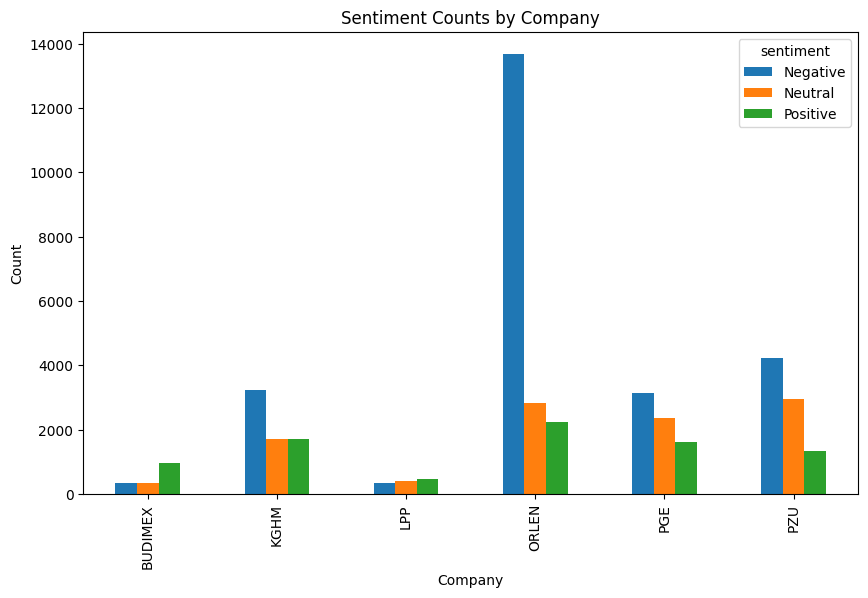

In [53]:
# Group by both 'company' and 'sentiment' and count occurrences
counts = dataset_analyzed.groupby(['company', 'sentiment']).size().unstack()
counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Company')
plt.ylabel('Count')
plt.title('Sentiment Counts by Company')
plt.show()


In [88]:
df_with_prices['year_month'] = df_with_prices['Data'].dt.to_period('M') 
monthly_sentiment_returns = df_with_prices.groupby(['company', 'sentiment', 'year_month'])['Return'].mean().unstack()
monthly_sentiment_returns


year_month          2023-05   2023-06   2023-07   2023-08   2023-09   2023-10  \
company sentiment                                                               
BUDIMEX Negative  -0.037195 -0.001667  0.009835  0.019340 -0.009785 -0.004979   
        Neutral         NaN  0.005749  0.022888  0.014365  0.004909  0.012869   
        Positive  -0.016443  0.003945 -0.003175  0.011170  0.003943  0.013644   
KGHM    Negative        NaN  0.017188  0.006973 -0.005576  0.000224  0.001683   
        Neutral         NaN  0.014475  0.005979 -0.004856 -0.004486  0.002382   
        Positive        NaN  0.017188  0.004632 -0.003318  0.000764 -0.000989   
LPP     Negative  -0.014941  0.019436  0.005503 -0.004788 -0.009194  0.004633   
        Neutral   -0.015853  0.007173  0.003978 -0.000159 -0.002438  0.005387   
        Positive  -0.020414  0.014158  0.006058  0.002066  0.024950  0.003225   
ORLEN   Negative        NaN       NaN       NaN -0.025357  0.008591       NaN   
        Neutral         NaN       NaN       NaN       NaN       NaN  0.064102   
        Positive        NaN       NaN       NaN       NaN -0.001372       NaN   
PGE     Negative        NaN       NaN       NaN       NaN       NaN       NaN   
        Neutral         NaN       NaN       NaN       NaN       NaN       NaN   
        Positive        NaN       NaN       NaN       NaN       NaN       NaN   
PZU     Negative  -0.003770  0.000115  0.004493  0.001119  0.002420  0.005246   
        Neutral   -0.001506 -0.001891  0.000721  0.001265  0.001270  0.008022   
        Positive  -0.002348 -0.000578  0.003826  0.002073 -0.002040  0.008475   

year_month          2023-11   2023-12   2024-01   2024-02   2024-03   2024-04  \
company sentiment                                                               
BUDIMEX Negative   0.010773  0.010556  0.014958 -0.000312 -0.019942 -0.004450   
        Neutral    0.007581  0.001079  0.018139  0.005509 -0.000992  0.005520   
        Positive   0.005708  0.004146  0.002304  0.007258 -0.012292 -0.001380   
KGHM    Negative   0.000822  0.007965 -0.006494 -0.002318  0.004374  0.015129   
        Neutral    0.004255  0.004171 -0.004769 -0.002318  0.005117  0.019901   
        Positive   0.002397  0.005707  0.001618 -0.002318  0.000232  0.017671   
LPP     Negative   0.007689 -0.001391  0.003950  0.009047  0.057325  0.003205   
        Neutral    0.003040  0.001405 -0.003525  0.004153  0.042029  0.003735   
        Positive   0.002615 -0.016706  0.009493  0.021866  0.053926  0.008076   
ORLEN   Negative  -0.009963 -0.011363 -0.003156  0.005294 -0.011277       NaN   
        Neutral         NaN       NaN -0.003980  0.004875 -0.011277       NaN   
        Positive        NaN       NaN -0.002516  0.005299 -0.011277       NaN   
PGE     Negative        NaN  0.009389  0.003129 -0.008079 -0.006500  0.001662   
        Neutral         NaN  0.011123  0.003592 -0.007324 -0.003912  0.001798   
        Positive        NaN  0.009624  0.000566 -0.006451 -0.006132 -0.000343   
PZU     Negative  -0.001853  0.003043  0.004226  0.002288  0.000496  0.007578   
        Neutral   -0.002613  0.002024  0.003294  0.000348  0.002701  0.007848   
        Positive   0.001301  0.004292  0.003989  0.002102  0.022026  0.010058   

year_month          2024-05   2024-06   2024-07  
company sentiment                                
BUDIMEX Negative   0.012569 -0.008567  0.003382  
        Neutral    0.009475  0.005398  0.000717  
        Positive   0.011567 -0.006478 -0.000282  
KGHM    Negative   0.004605 -0.002459       NaN  
        Neutral    0.004221 -0.006581       NaN  
        Positive   0.008077  0.004649       NaN  
LPP     Negative   0.007299 -0.020787       NaN  
        Neutral    0.002947  0.024221       NaN  
        Positive   0.006750  0.024221       NaN  
ORLEN   Negative  -0.013946  0.003784       NaN  
        Neutral   -0.013688  0.005003       NaN  
        Positive  -0.018141  0.003764       NaN  
PGE     Negative  -0.008845  0.012085  0.000271  
        

In [47]:
sentiment_returns = df_with_prices.groupby(['company', 'sentiment'])['Return'].mean().unstack()
sentiment_returns

sentiment  Negative   Neutral  Positive
company                                
BUDIMEX    0.001820  0.007288  0.002716
KGHM       0.003327  0.004097  0.004311
LPP        0.006753  0.003369  0.008918
ORLEN      0.002041  0.001616  0.002116
PGE        0.000877  0.002613  0.000810
PZU        0.001774  0.001445  0.002005

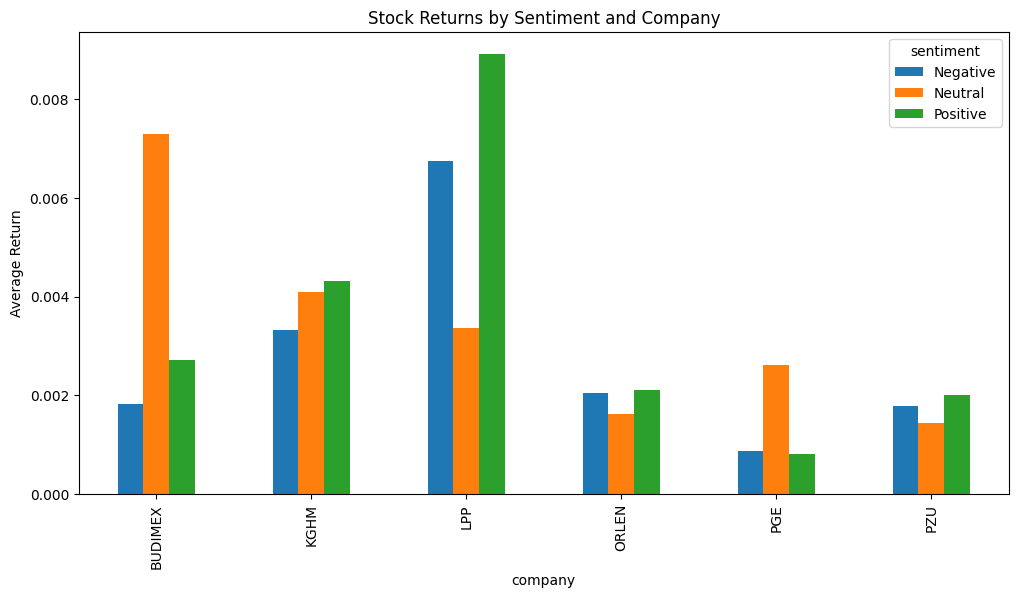

In [48]:
sentiment_returns.plot(kind='bar', figsize=(12,6))
plt.title('Stock Returns by Sentiment and Company')
plt.ylabel('Average Return')
plt.show()

In [51]:
correlation_matrix = df_with_prices[['view_count', 'retweet_count', 'confidence', 'Otwarcie', 'Najwyzszy', 'Najnizszy', 'Zamkniecie', 'Wolumen', 'Return']].corr()
correlation_matrix

view_count  retweet_count  confidence  Otwarcie  Najwyzszy  \
view_count       1.000000       0.498943   -0.007125 -0.002632  -0.002609   
retweet_count    0.498943       1.000000    0.008840 -0.015735  -0.015743   
confidence      -0.007125       0.008840    1.000000 -0.047738  -0.047814   
Otwarcie        -0.002632      -0.015735   -0.047738  1.000000   0.999877   
Najwyzszy       -0.002609      -0.015743   -0.047814  0.999877   1.000000   
Najnizszy       -0.002620      -0.015758   -0.047875  0.999930   0.999906   
Zamkniecie      -0.002615      -0.015772   -0.047860  0.999740   0.999919   
Wolumen         -0.002287       0.012631    0.025876 -0.247387  -0.247370   
Return           0.002395       0.000496   -0.003054  0.035560   0.038988   

               Najnizszy  Zamkniecie   Wolumen    Return  
view_count     -0.002620   -0.002615 -0.002287  0.002395  
retweet_count  -0.015758   -0.015772  0.012631  0.000496  
confidence     -0.047875   -0.047860  0.025876 -0.003054  
Otwarcie        0.999930    0.999740 -0.247387  0.035560  
Najwyzszy       0.999906    0.999919 -0.247370  0.038988  
Najnizszy       1.000000    0.999865 -0.247329  0.037657  
Zamkniecie      0.999865    1.000000 -0.247326  0.041362  
Wolumen        -0.247329   -0.247326  1.000000  0.086719  
Return          0.037657    0.041362  0.086719  1.000000

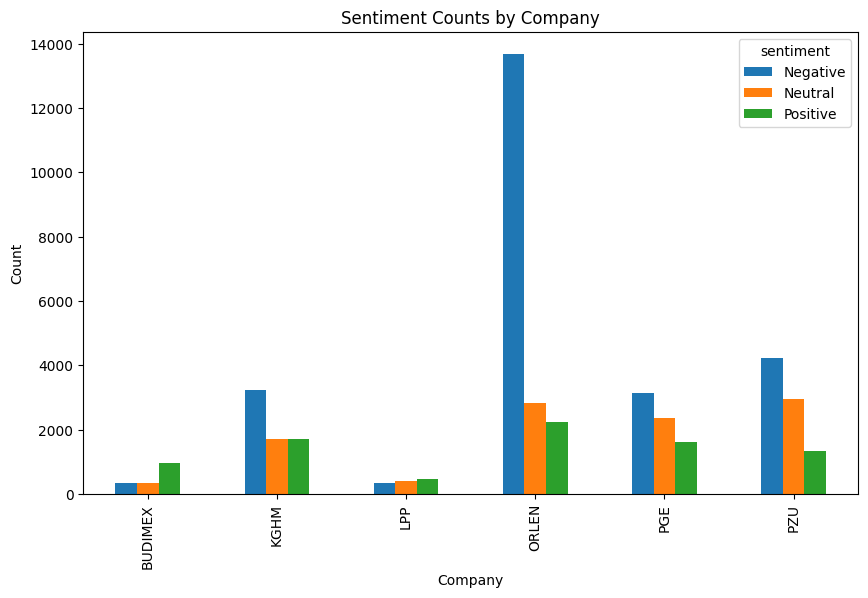

<Figure size 3000x1500 with 0 Axes>

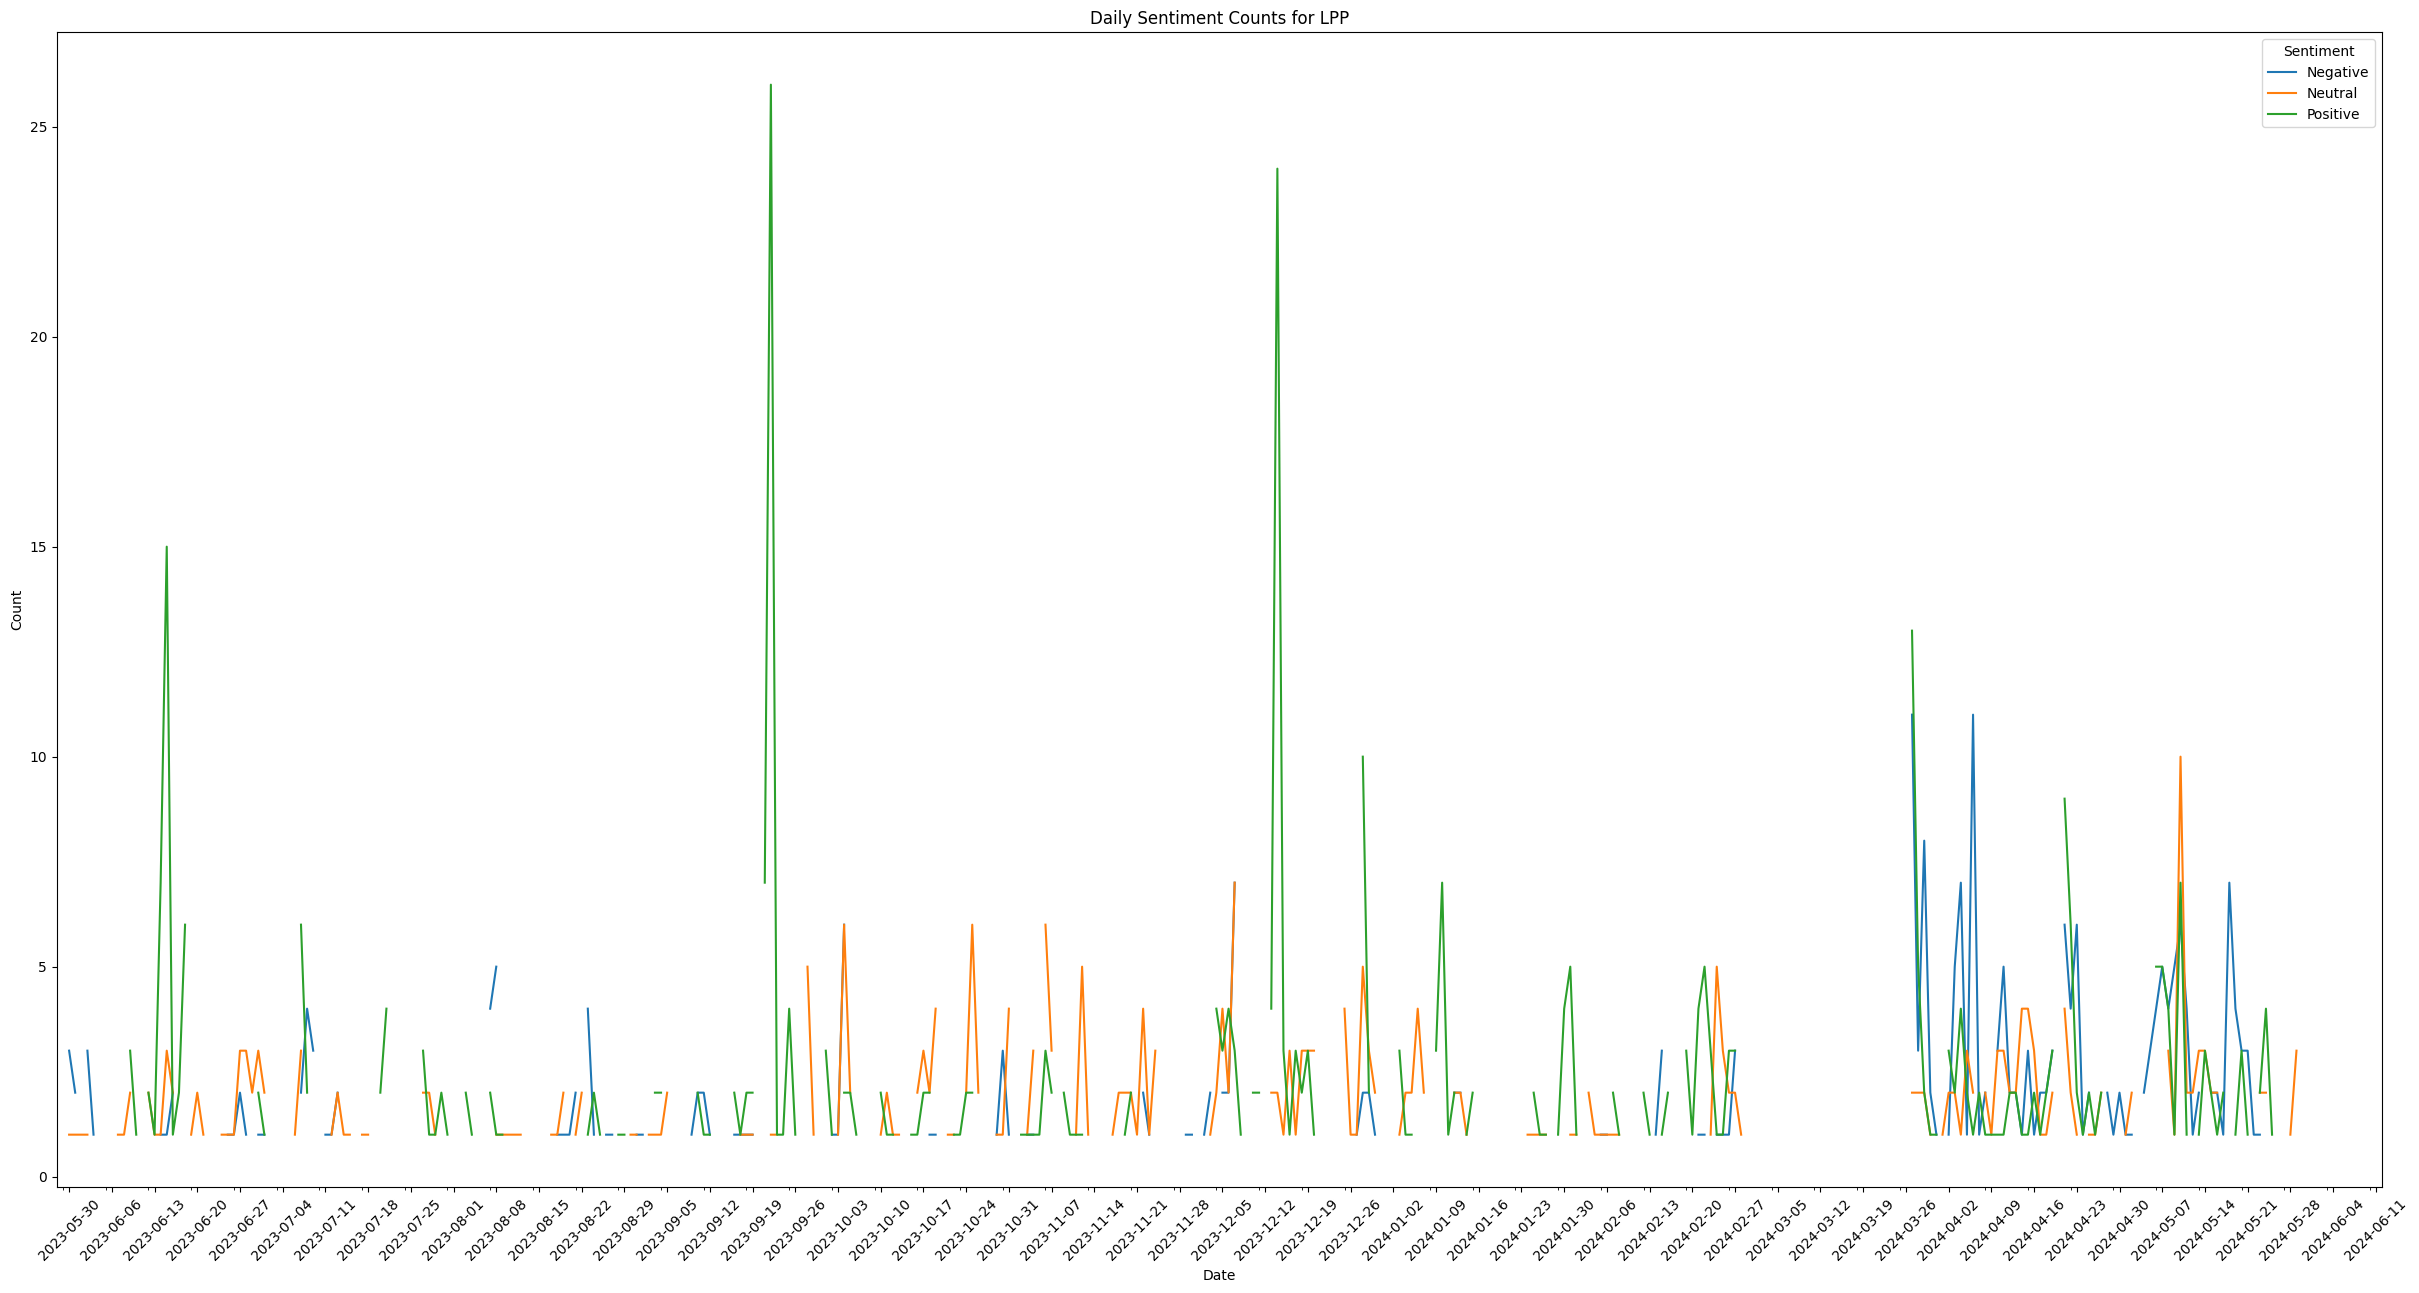

In [63]:

# Ensure 'created_at' is datetime
df_processed['created_at'] = pd.to_datetime(df_processed['created_at'], errors='coerce')

# Group by 'created_at' and 'sentiment' and get daily counts
counts = df_processed[df_processed['company'] == 'LPP'].groupby(['created_at', 'sentiment']).size().unstack()
full_date_range = pd.date_range(start=counts.index.min(), end=counts.index.max())
counts = counts.reindex(full_date_range, fill_value=None)  # Fill missing dates with NaN

# Plot the data
plt.figure(figsize=(30, 15))
counts.plot(kind='line', figsize=(30, 15))

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Daily Sentiment Counts for LPP')

# Rotate date labels for readability
plt.xticks(rotation=45)

# Configure date formatting
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator())  # Ticks for each week
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Date format

plt.legend(title='Sentiment')
plt.show()


<Figure size 3000x1500 with 0 Axes>

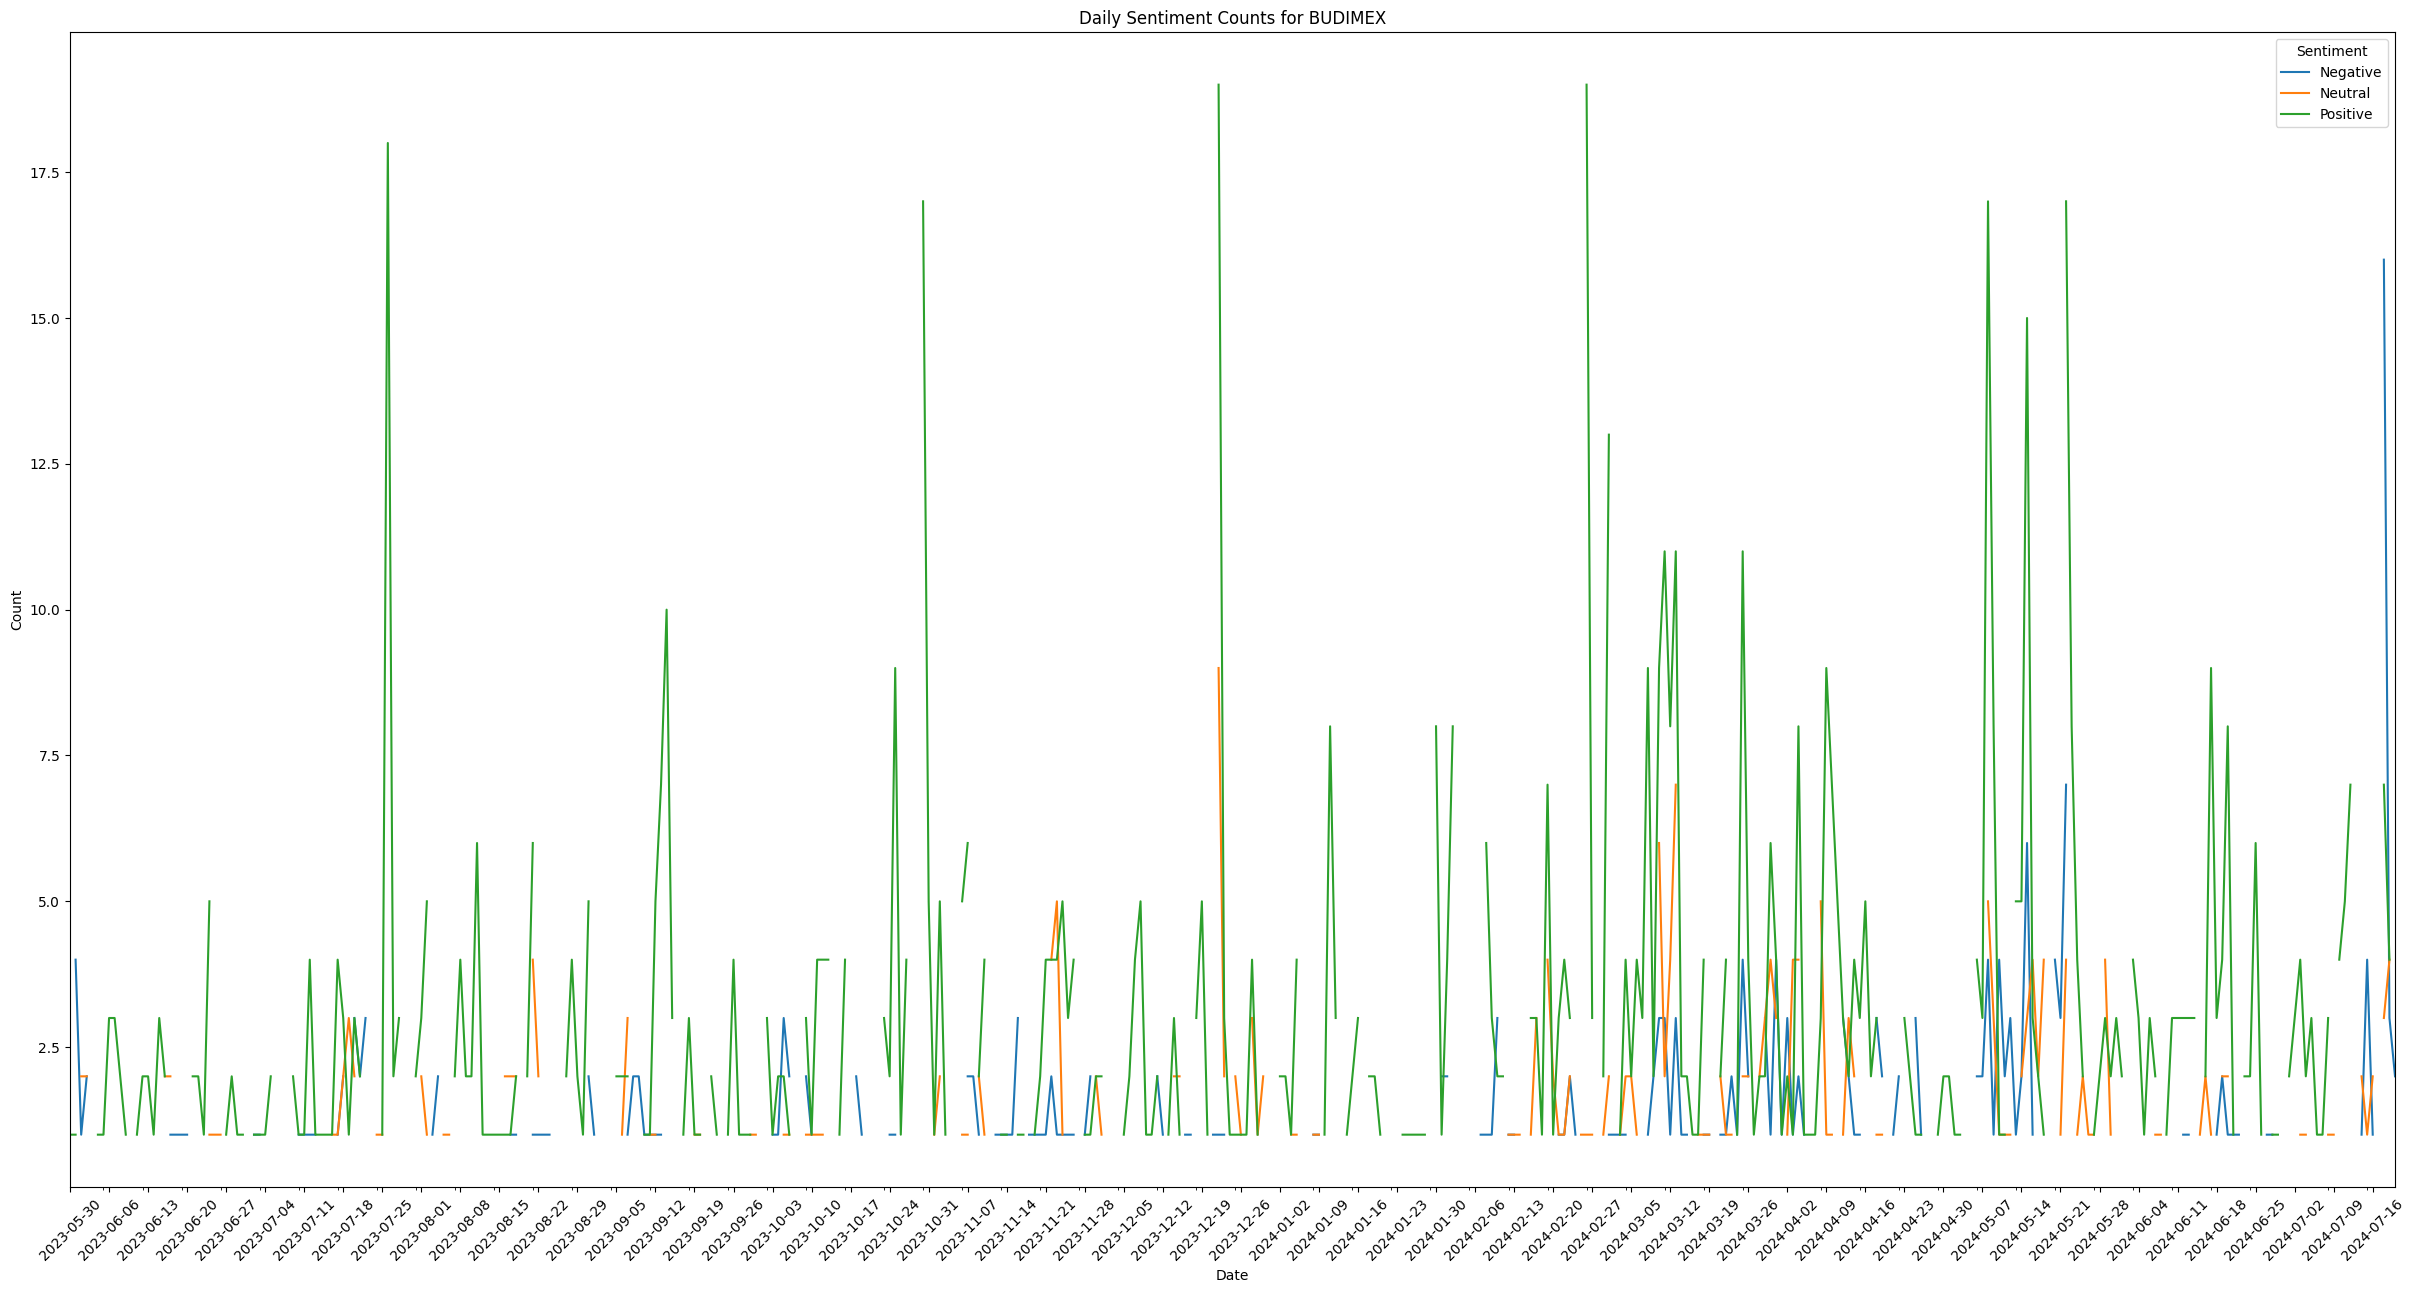

In [60]:

# Ensure 'created_at' is datetime
df_processed['created_at'] = pd.to_datetime(df_processed['created_at'], errors='coerce')

# Group by 'created_at' and 'sentiment' and get daily counts
counts = df_processed[df_processed['company'] == 'BUDIMEX'].groupby(['created_at', 'sentiment']).size().unstack()
full_date_range = pd.date_range(start=counts.index.min(), end=counts.index.max())
counts = counts.reindex(full_date_range, fill_value=None)  # Fill missing dates with NaN

# Plot the data
plt.figure(figsize=(30, 15))
counts.plot(kind='line', figsize=(30, 15))

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Daily Sentiment Counts for BUDIMEX')

# Rotate date labels for readability
plt.xticks(rotation=45)

# Configure date formatting
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator())  # Ticks for each week
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Date format

plt.legend(title='Sentiment')
plt.show()


<Figure size 3000x1500 with 0 Axes>

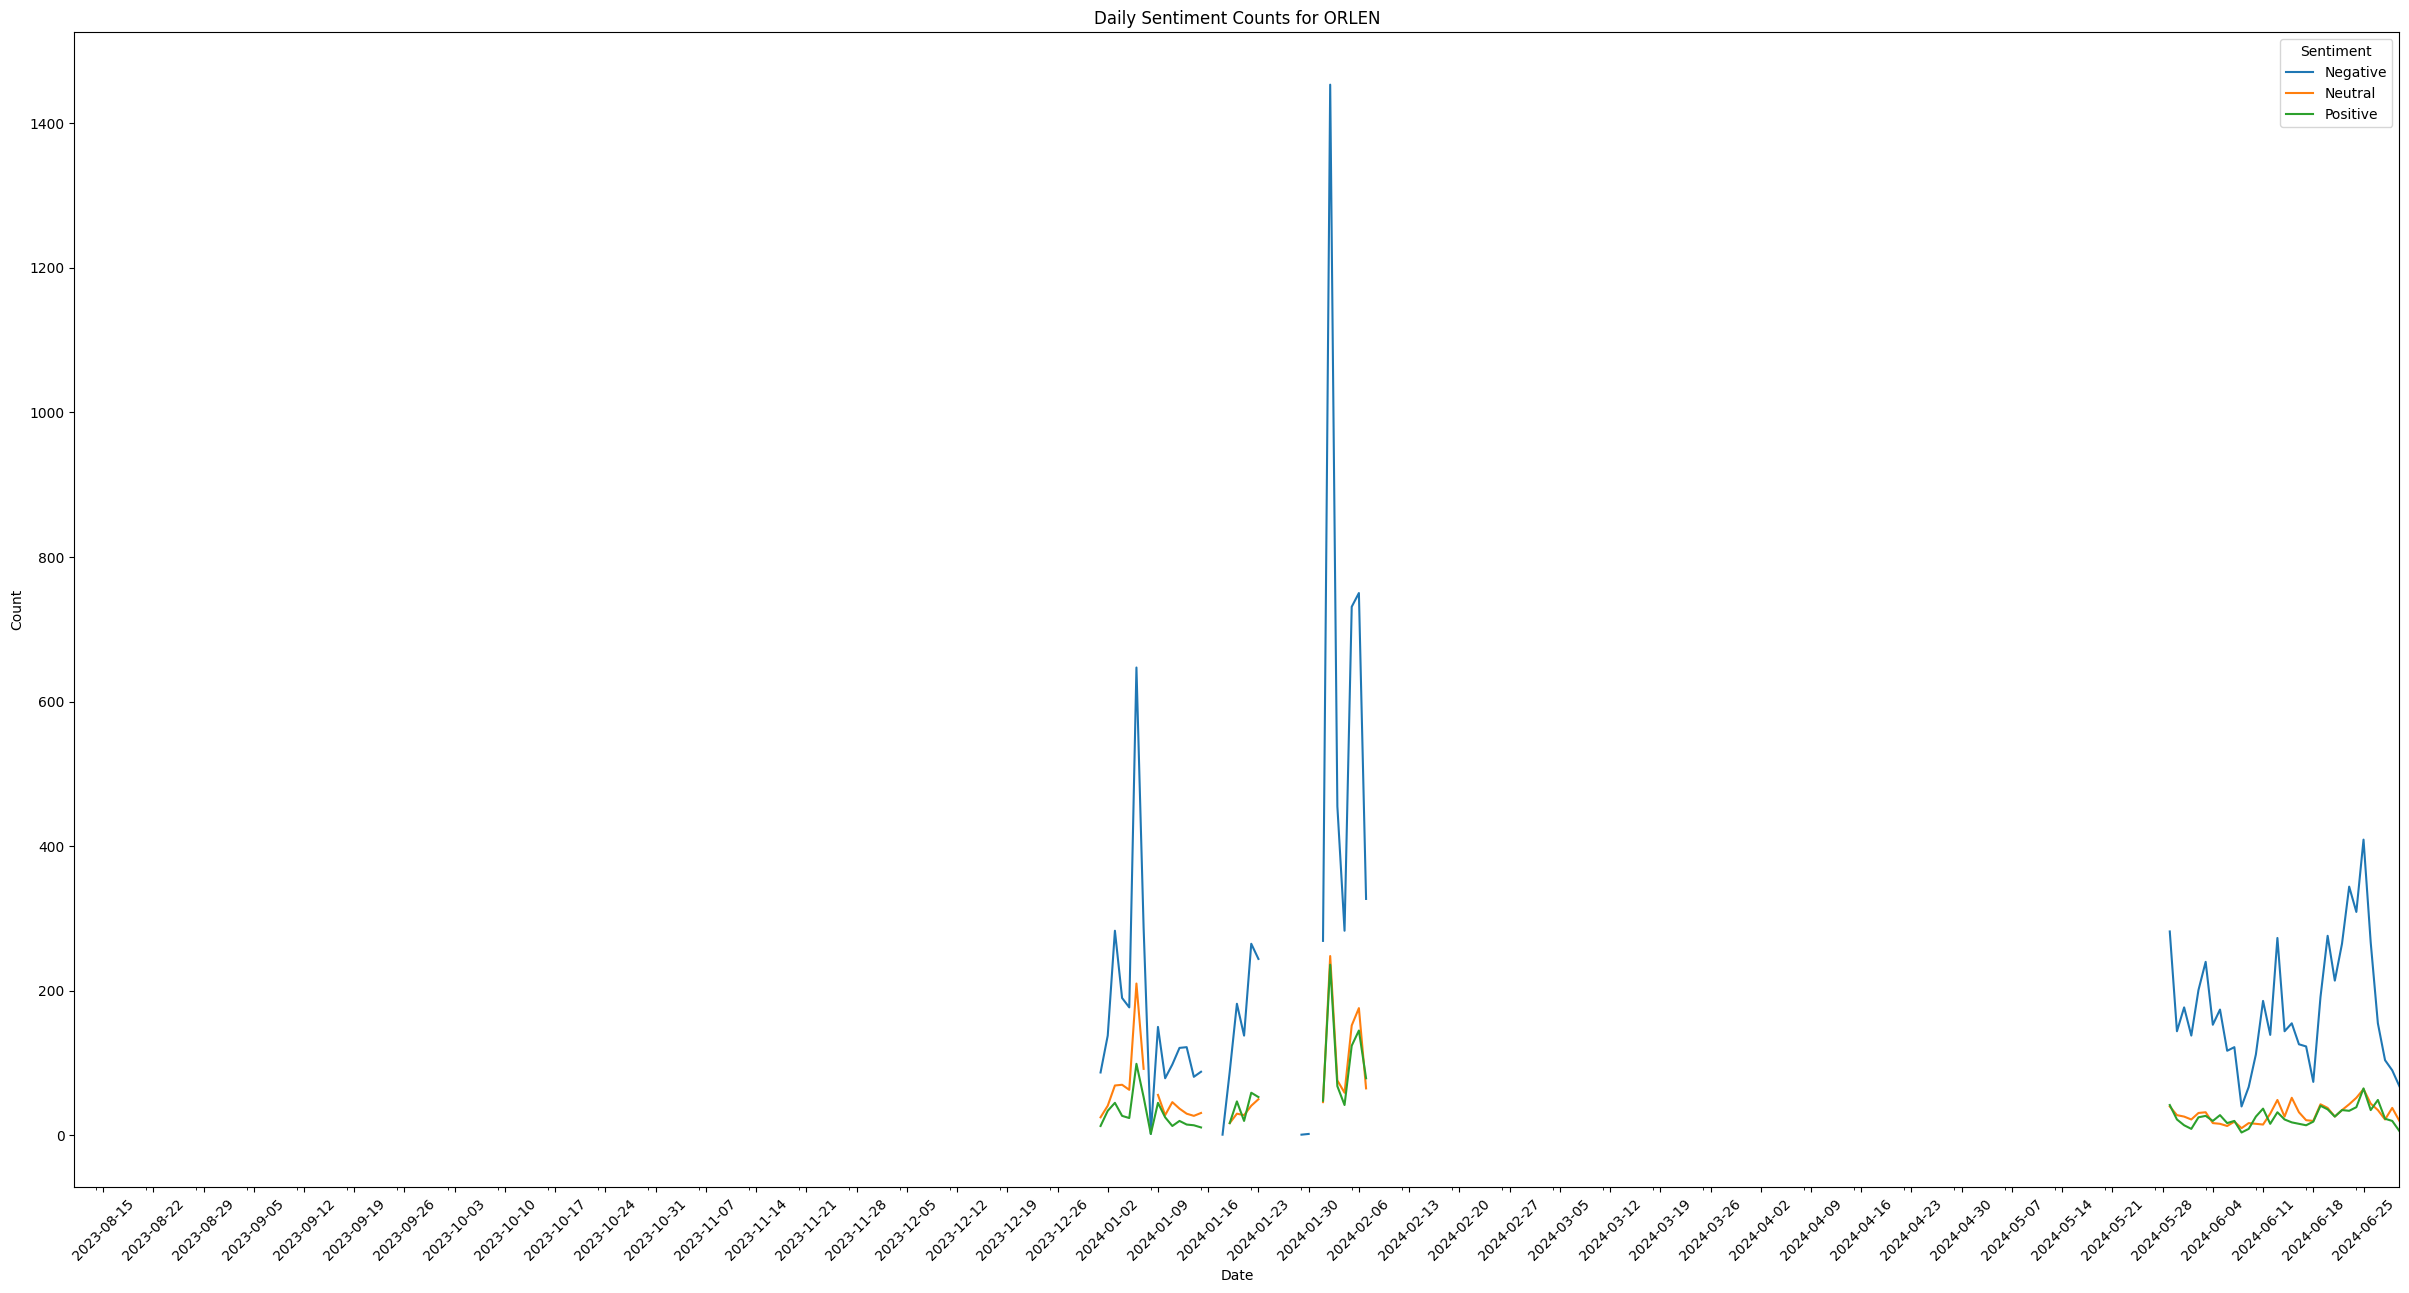

In [53]:

# Ensure 'created_at' is datetime
df_processed['created_at'] = pd.to_datetime(df_processed['created_at'], errors='coerce')

# Group by 'created_at' and 'sentiment' and get daily counts
counts = df_processed[df_processed['company'] == 'ORLEN'].groupby(['created_at', 'sentiment']).size().unstack()
full_date_range = pd.date_range(start=counts.index.min(), end=counts.index.max())
counts = counts.reindex(full_date_range, fill_value=None)  # Fill missing dates with NaN

# Plot the data
plt.figure(figsize=(30, 15))
counts.plot(kind='line', figsize=(30, 15))

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Daily Sentiment Counts for ORLEN')

# Rotate date labels for readability
plt.xticks(rotation=45)

# Configure date formatting
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator())  # Ticks for each week
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Date format

plt.legend(title='Sentiment')
plt.show()


<Figure size 3000x1500 with 0 Axes>

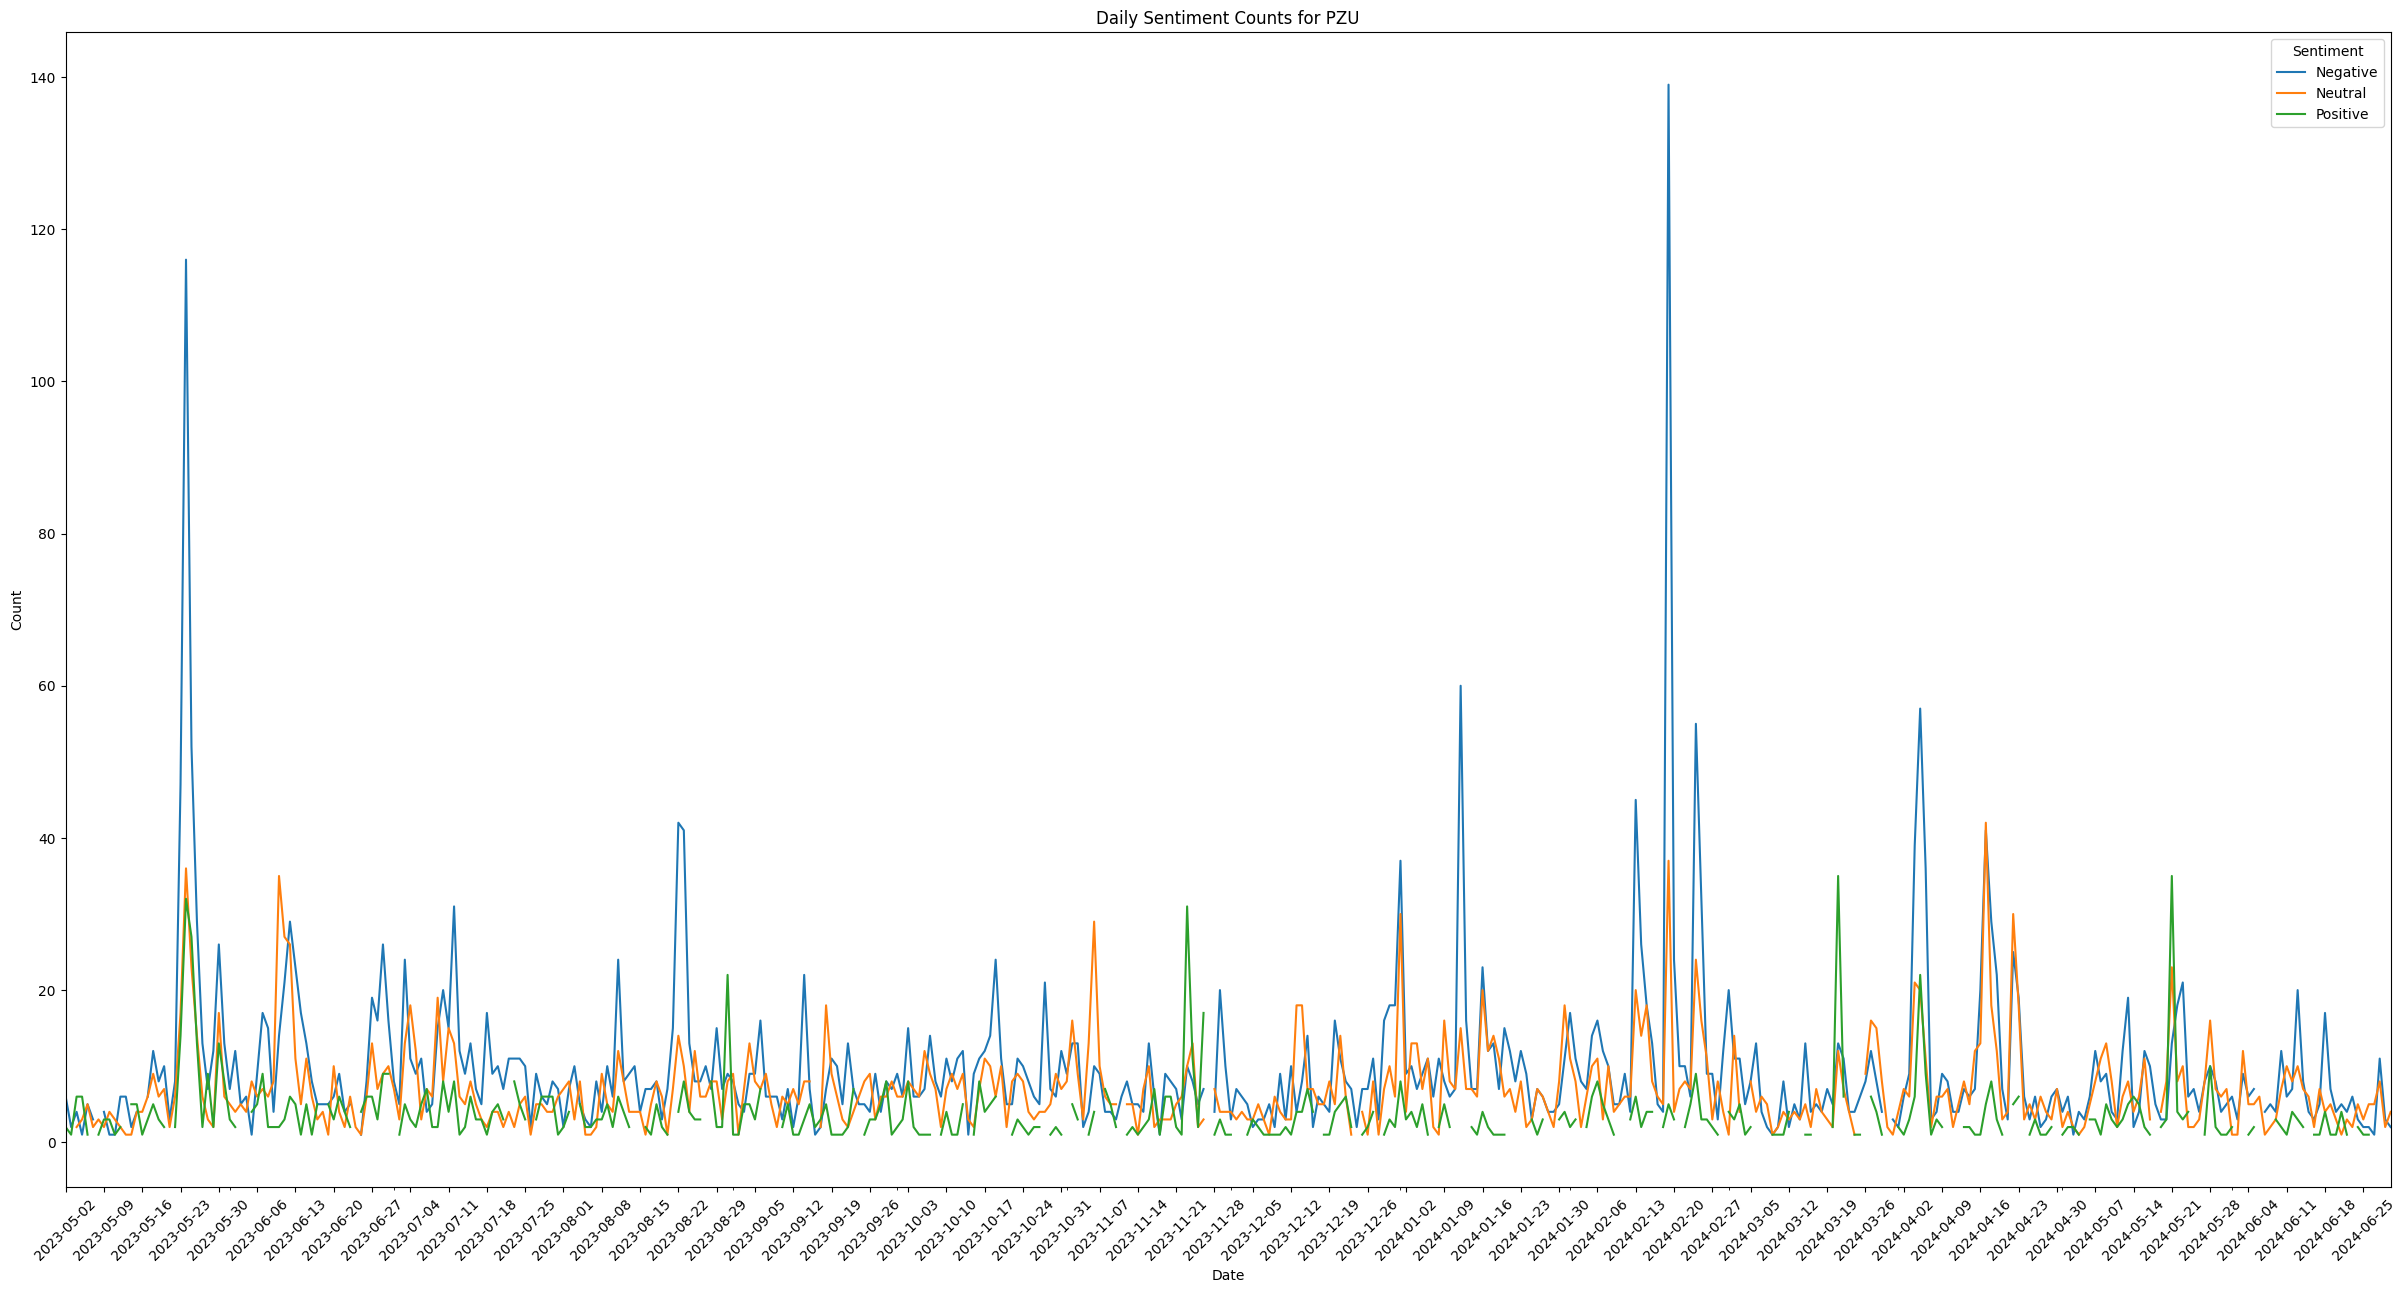

In [54]:

# Ensure 'created_at' is datetime
df_processed['created_at'] = pd.to_datetime(df_processed['created_at'], errors='coerce')

# Group by 'created_at' and 'sentiment' and get daily counts
counts = df_processed[df_processed['company'] == 'PZU'].groupby(['created_at', 'sentiment']).size().unstack()
full_date_range = pd.date_range(start=counts.index.min(), end=counts.index.max())
counts = counts.reindex(full_date_range, fill_value=None)  # Fill missing dates with NaN

# Plot the data
plt.figure(figsize=(30, 15))
counts.plot(kind='line', figsize=(30, 15))

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Daily Sentiment Counts for PZU')

# Rotate date labels for readability
plt.xticks(rotation=45)

# Configure date formatting
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator())  # Ticks for each week
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Date format

plt.legend(title='Sentiment')
plt.show()


<Figure size 3000x1500 with 0 Axes>

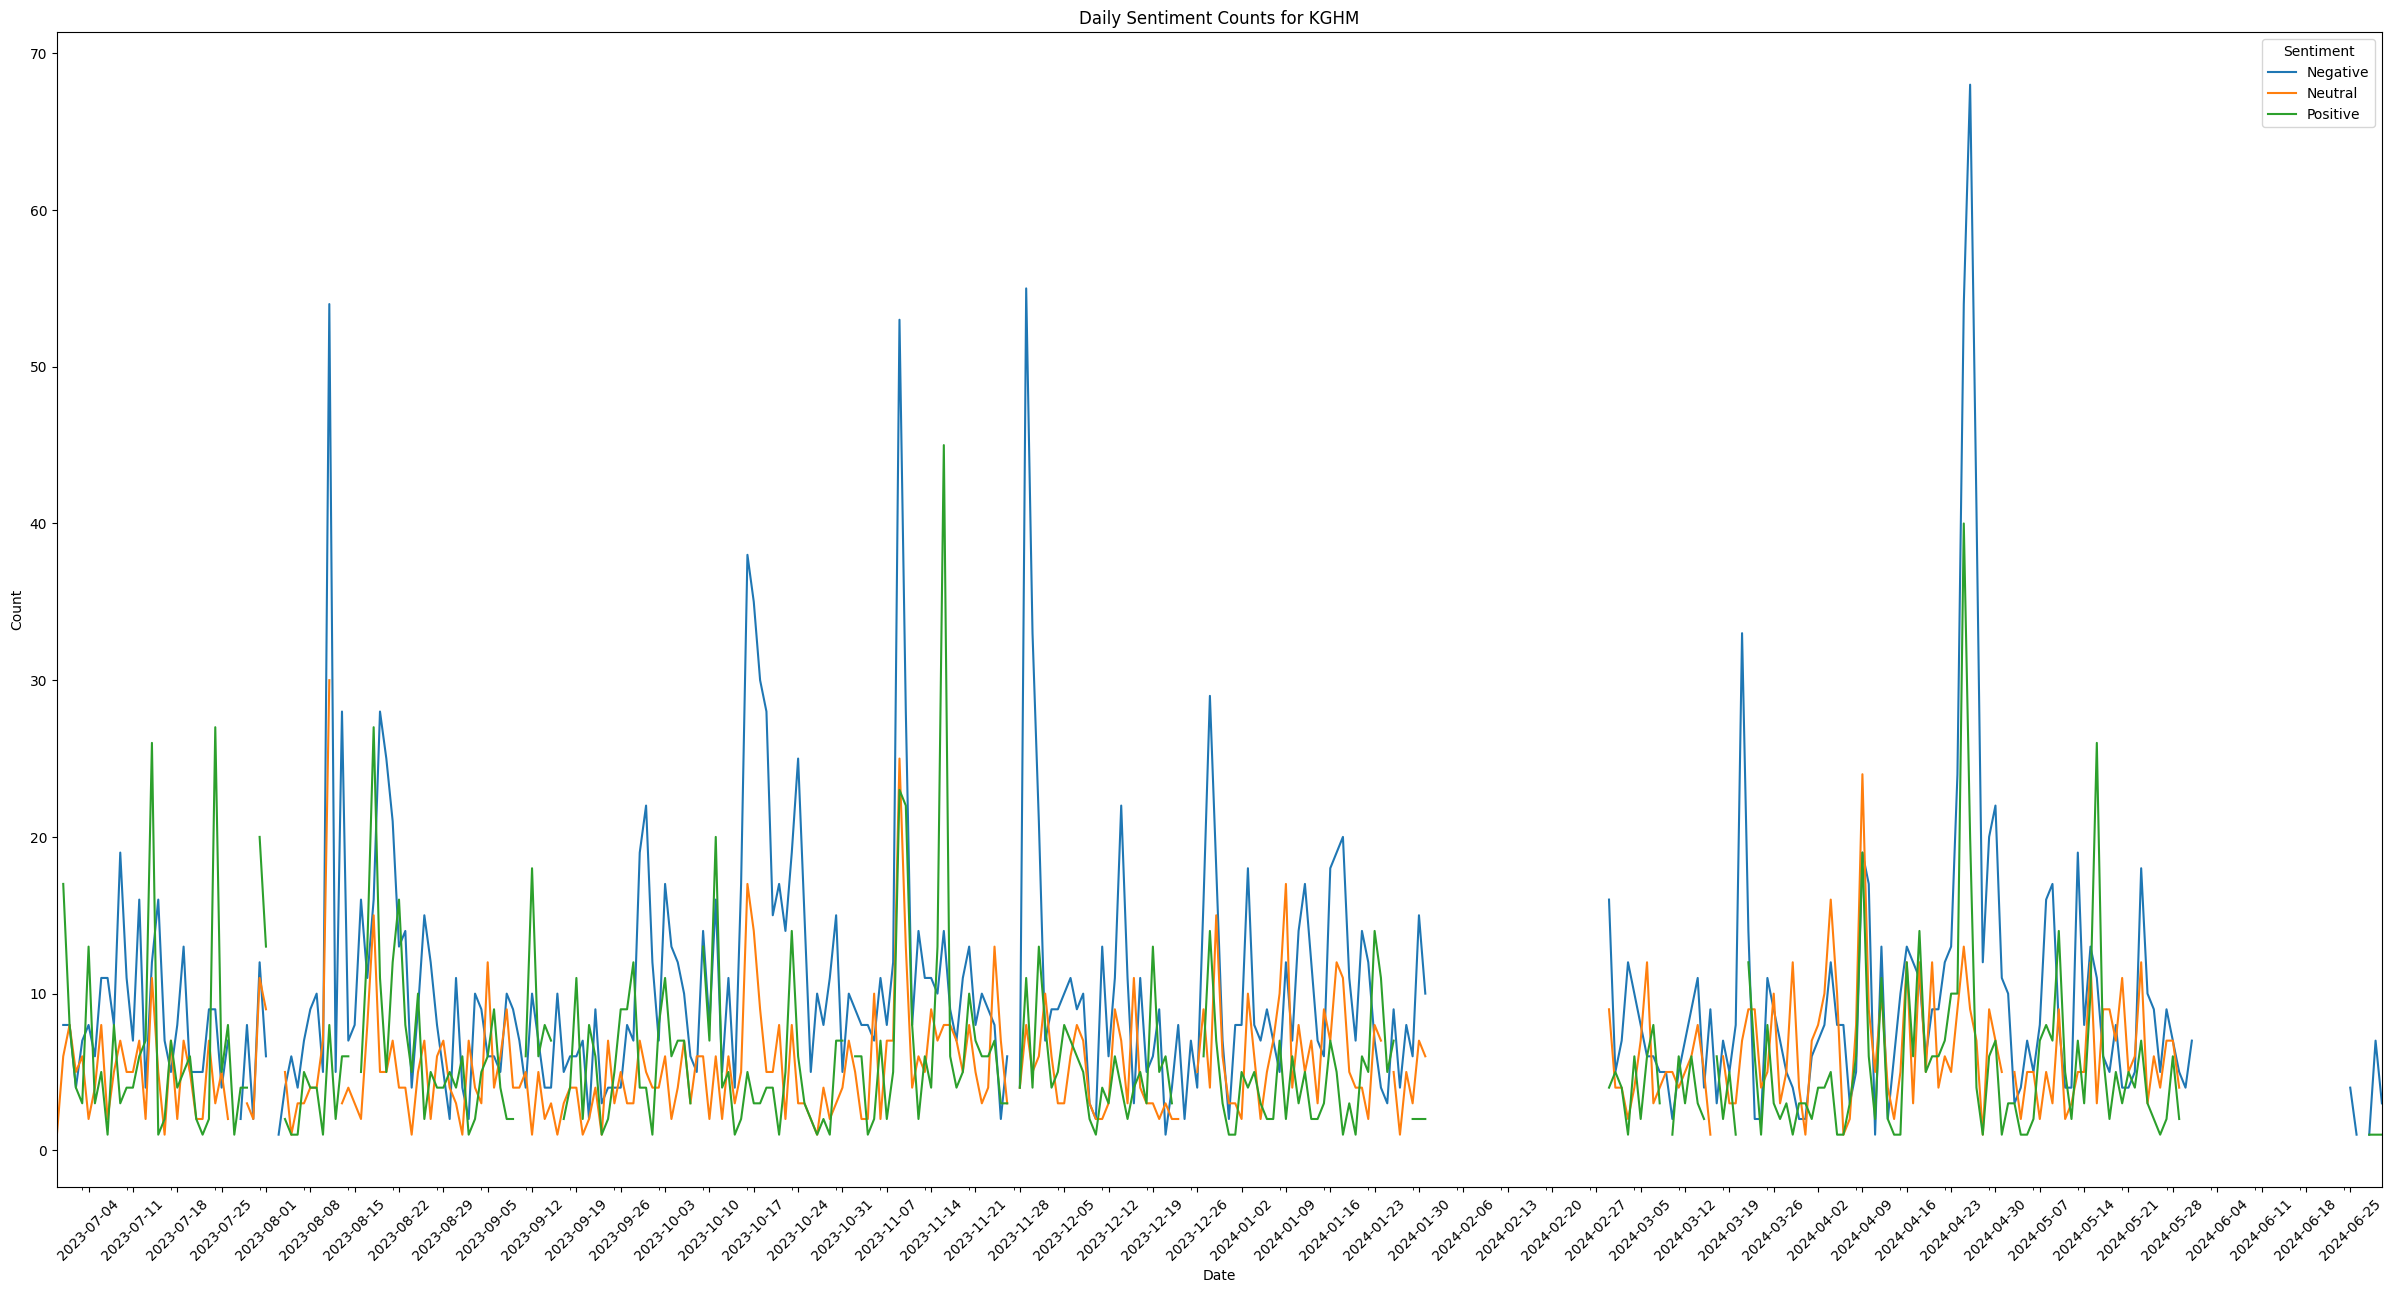

In [56]:

# Ensure 'created_at' is datetime
df_processed['created_at'] = pd.to_datetime(df_processed['created_at'], errors='coerce')

# Group by 'created_at' and 'sentiment' and get daily counts
counts = df_processed[df_processed['company'] == 'KGHM'].groupby(['created_at', 'sentiment']).size().unstack()
full_date_range = pd.date_range(start=counts.index.min(), end=counts.index.max())
counts = counts.reindex(full_date_range, fill_value=None)  # Fill missing dates with NaN

# Plot the data
plt.figure(figsize=(30, 15))
counts.plot(kind='line', figsize=(30, 15))

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Daily Sentiment Counts for KGHM')

# Rotate date labels for readability
plt.xticks(rotation=45)

# Configure date formatting
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator())  # Ticks for each week
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Date format

plt.legend(title='Sentiment')
plt.show()


<Figure size 3000x1500 with 0 Axes>

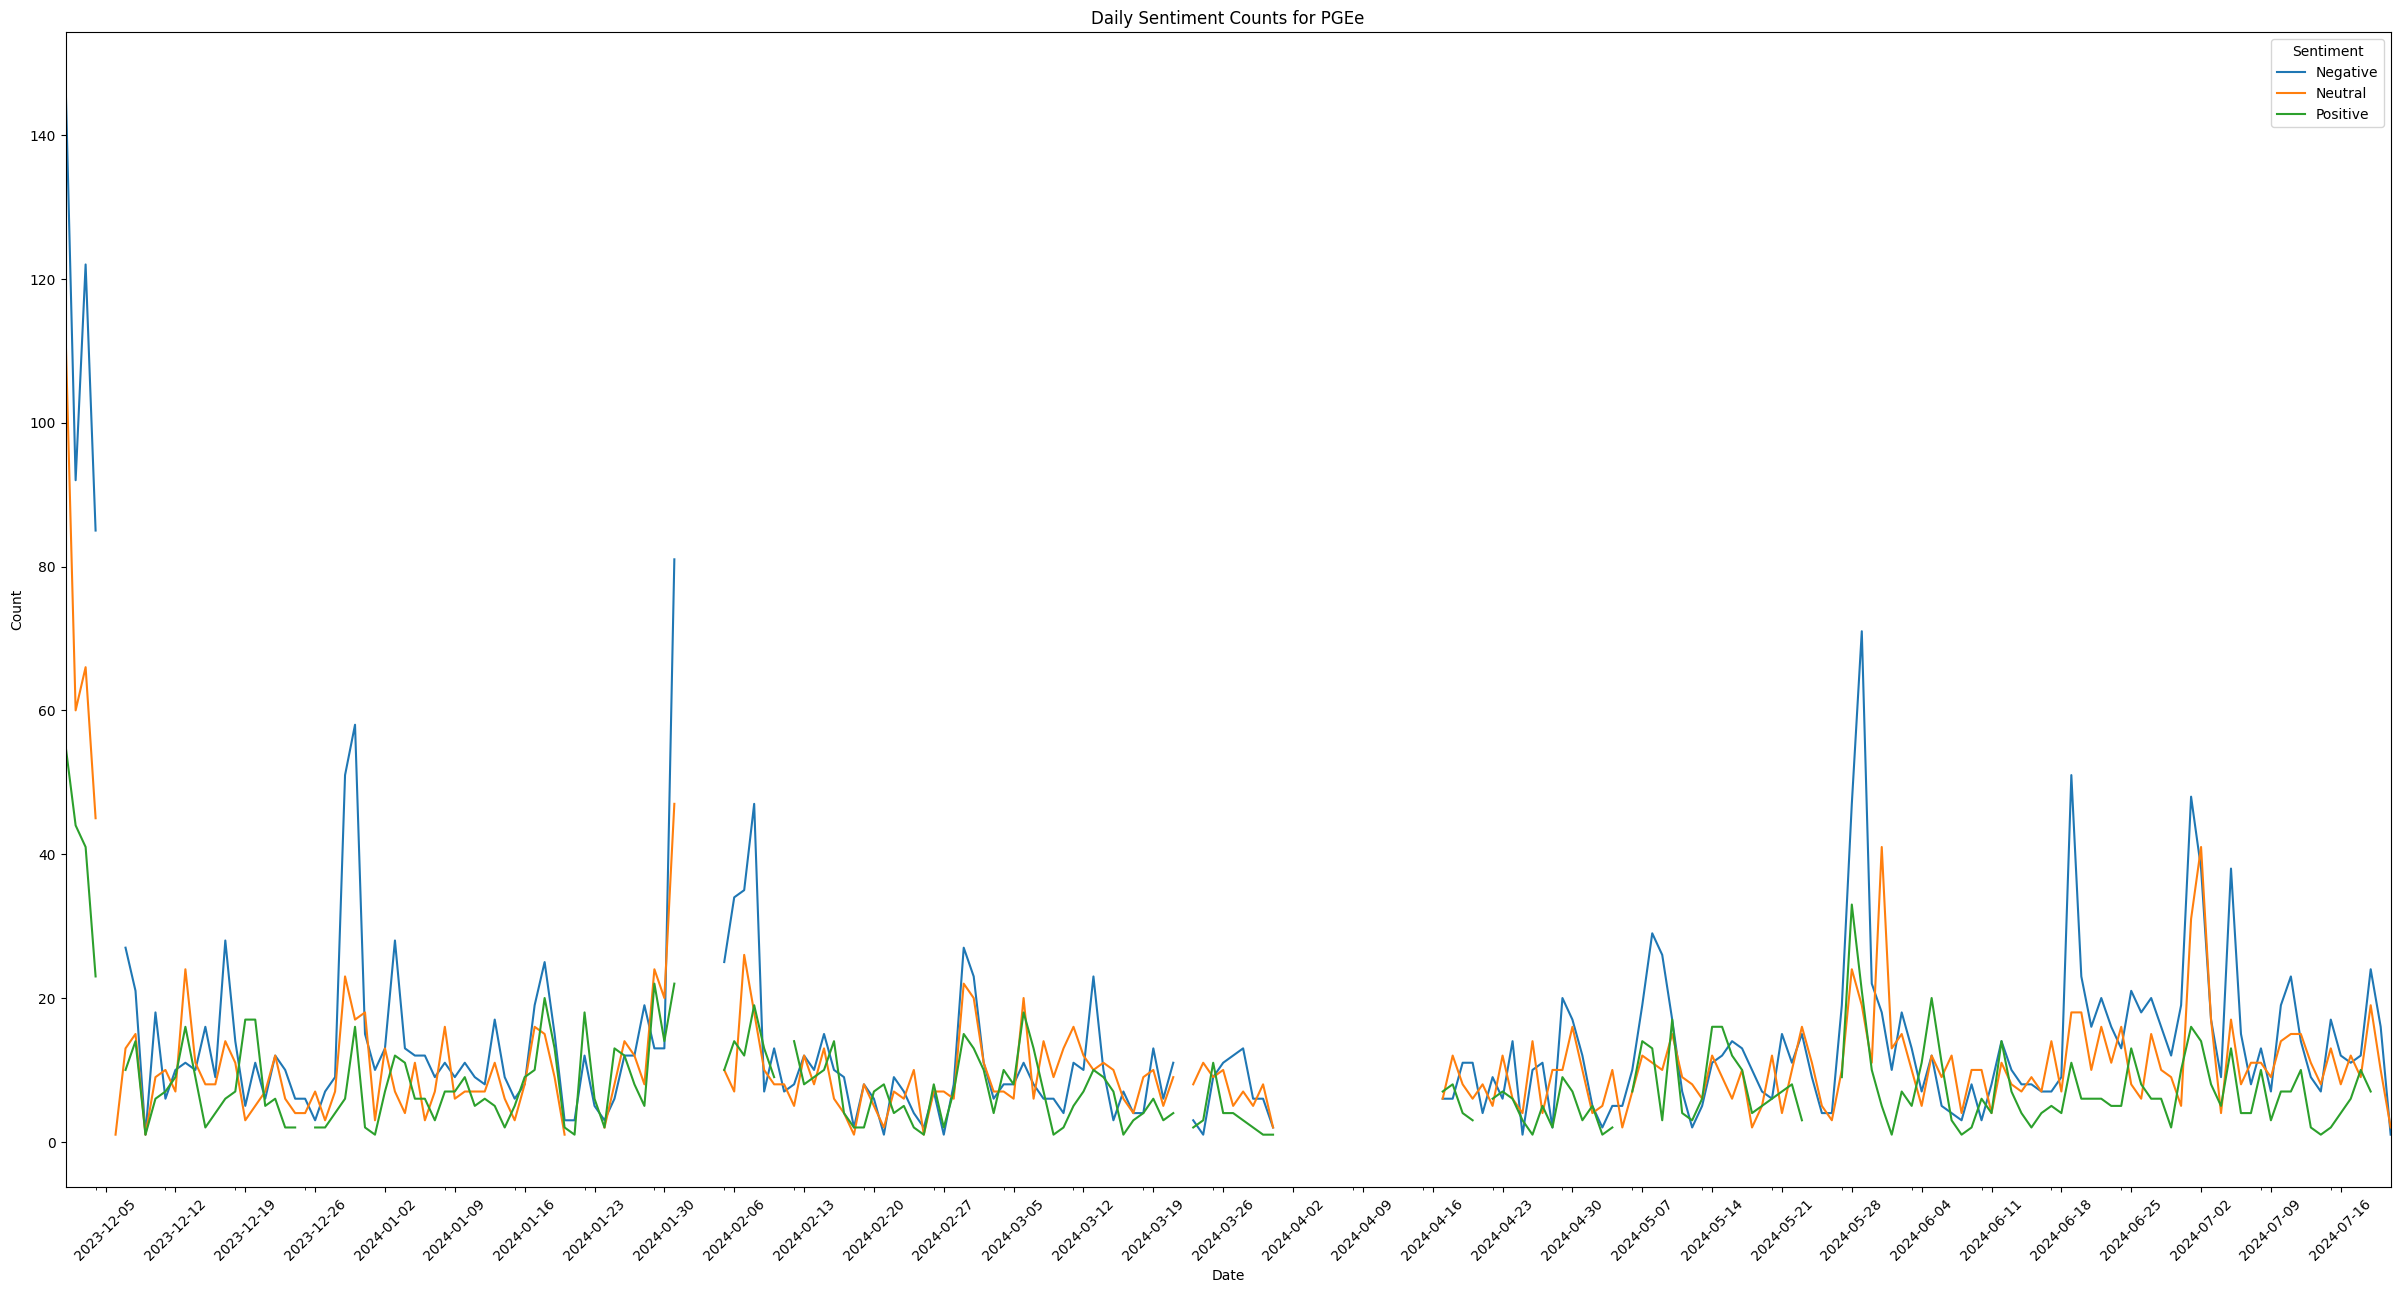

In [58]:

# Ensure 'created_at' is datetime
df_processed['created_at'] = pd.to_datetime(df_processed['created_at'], errors='coerce')

# Group by 'created_at' and 'sentiment' and get daily counts
counts = df_processed[df_processed['company'] == 'PGE'].groupby(['created_at', 'sentiment']).size().unstack()
full_date_range = pd.date_range(start=counts.index.min(), end=counts.index.max())
counts = counts.reindex(full_date_range, fill_value=None)  # Fill missing dates with NaN

# Plot the data
plt.figure(figsize=(30, 15))
counts.plot(kind='line', figsize=(30, 15))

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Daily Sentiment Counts for PGEe')

# Rotate date labels for readability
plt.xticks(rotation=45)

# Configure date formatting
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator())  # Ticks for each week
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Date format

plt.legend(title='Sentiment')
plt.show()


In [120]:
def analyze_company_basic(data, company_name):
    print(f"\nAnalysis for {company_name}")
    company_data = data[data['company']==company_name]
    # 1. Sentiment vs Stock Price Correlation
    correlation = company_data['sentiment_score'].corr(company_data['Zamkniecie'])
    print(f"Correlation between sentiment score and closing price: {correlation:.2f}")
    
    # 2. Tweet Volume vs Stock Volatility
    vol_corr = company_data['tweet_volume'].corr(company_data['volatility'])
    print(f"Correlation between tweet volume and stock volatility: {vol_corr:.2f}")
    
    # 3. Extreme Sentiment Days Analysis
    sentiment_mean = company_data['sentiment_score'].mean()
    sentiment_std = company_data['sentiment_score'].std()
    company_data['extreme_sentiment'] = np.abs(company_data['sentiment_score'] - sentiment_mean) > 2 * sentiment_std
    
    extreme_days_return = company_data[company_data['extreme_sentiment']]['Return'].mean()
    normal_days_return = company_data[~company_data['extreme_sentiment']]['Return'].mean()
    
    print(f"Average return on extreme sentiment days: {extreme_days_return:.4f}")
    print(f"Average return on normal sentiment days: {normal_days_return:.4f}")
    
    # 4. Lag Analysis: Sentiment leading indicator
    for lag in range(1, 6):
        correlation = company_data['sentiment_score'].shift(lag).corr(company_data['Return'])
        print(f"Correlation between sentiment score and return with {lag} day lag: {correlation:.2f}")
    
    return company_data

In [21]:
df_pzu = analyze_company(merged_daily,'PZU')


Analysis for PZU
Correlation between sentiment score and closing price: 0.01
Correlation between tweet volume and stock volatility: 0.02
Average return on extreme sentiment days: 0.0045
Average return on normal sentiment days: 0.0013
Correlation between sentiment score and return with 1 day lag: -0.07
Correlation between sentiment score and return with 2 day lag: -0.02
Correlation between sentiment score and return with 3 day lag: -0.01
Correlation between sentiment score and return with 4 day lag: -0.08
Correlation between sentiment score and return with 5 day lag: 0.11


C:\Users\szymo\AppData\Local\Temp\ipykernel_15308\1268299780.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_data['extreme_sentiment'] = np.abs(company_data['sentiment_score'] - sentiment_mean) > 2 * sentiment_std


In [24]:
df_lpp = analyze_company(merged_daily,'LPP')


Analysis for LPP
Correlation between sentiment score and closing price: 0.06
Correlation between tweet volume and stock volatility: 0.09
Average return on extreme sentiment days: -0.0038
Average return on normal sentiment days: 0.0037
Correlation between sentiment score and return with 1 day lag: 0.09
Correlation between sentiment score and return with 2 day lag: -0.05
Correlation between sentiment score and return with 3 day lag: -0.08
Correlation between sentiment score and return with 4 day lag: 0.01
Correlation between sentiment score and return with 5 day lag: 0.01


C:\Users\szymo\AppData\Local\Temp\ipykernel_15308\1268299780.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_data['extreme_sentiment'] = np.abs(company_data['sentiment_score'] - sentiment_mean) > 2 * sentiment_std


In [27]:
df_budimex = analyze_company(merged_daily,'BUDIMEX')


Analysis for BUDIMEX
Correlation between sentiment score and closing price: 0.14
Correlation between tweet volume and stock volatility: 0.21
Average return on extreme sentiment days: 0.0063
Average return on normal sentiment days: 0.0026
Correlation between sentiment score and return with 1 day lag: -0.07
Correlation between sentiment score and return with 2 day lag: 0.07
Correlation between sentiment score and return with 3 day lag: -0.04
Correlation between sentiment score and return with 4 day lag: -0.04
Correlation between sentiment score and return with 5 day lag: -0.08


C:\Users\szymo\AppData\Local\Temp\ipykernel_15308\1268299780.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_data['extreme_sentiment'] = np.abs(company_data['sentiment_score'] - sentiment_mean) > 2 * sentiment_std


In [26]:
df_orlen = analyze_company(merged_daily,'ORLEN')


Analysis for ORLEN
Correlation between sentiment score and closing price: -0.41
Correlation between tweet volume and stock volatility: -0.02
Average return on extreme sentiment days: 0.0015
Average return on normal sentiment days: 0.0013
Correlation between sentiment score and return with 1 day lag: 0.08
Correlation between sentiment score and return with 2 day lag: 0.03
Correlation between sentiment score and return with 3 day lag: 0.11
Correlation between sentiment score and return with 4 day lag: 0.18
Correlation between sentiment score and return with 5 day lag: 0.16


C:\Users\szymo\AppData\Local\Temp\ipykernel_15308\1268299780.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_data['extreme_sentiment'] = np.abs(company_data['sentiment_score'] - sentiment_mean) > 2 * sentiment_std


In [29]:
df_budimex = analyze_company(merged_daily,'PGE')


Analysis for PGE
Correlation between sentiment score and closing price: -0.08
Correlation between tweet volume and stock volatility: 0.16
Average return on extreme sentiment days: 0.0048
Average return on normal sentiment days: -0.0004
Correlation between sentiment score and return with 1 day lag: 0.04
Correlation between sentiment score and return with 2 day lag: -0.01
Correlation between sentiment score and return with 3 day lag: -0.01
Correlation between sentiment score and return with 4 day lag: -0.03
Correlation between sentiment score and return with 5 day lag: -0.02


C:\Users\szymo\AppData\Local\Temp\ipykernel_15308\1268299780.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_data['extreme_sentiment'] = np.abs(company_data['sentiment_score'] - sentiment_mean) > 2 * sentiment_std


In [12]:
aggregations = {
    'view_count': 'sum', 
    'retweet_count': 'sum'
}

grouped_metrics = df_with_prices.groupby(['company','created_at', 'sentiment']).agg(aggregations).unstack()
grouped_metrics['view_count'] = grouped_metrics['view_count'].fillna(0)
grouped_metrics['retweet_count'] = grouped_metrics['retweet_count'].fillna(0)
grouped_metrics = grouped_metrics.reset_index()
grouped_metrics.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in grouped_metrics.columns]

grouped_metrics = grouped_metrics.rename(columns = {'company_':'company','created_at_':'created_at'})

merged_daily = pd.merge(grouped_metrics,df_with_prices[['Data','company','Otwarcie','Najwyzszy','Najnizszy','Zamkniecie','Wolumen','Return']].drop_duplicates(),left_on=['company','created_at'],right_on=['company','Data'])
merged_daily.drop(['Data'],axis=1,inplace=True)
df_counted = df_with_prices.groupby(['company', 'created_at', 'sentiment']).size().unstack(fill_value=0)
merged_daily = merged_daily.join(df_counted, on=['company', 'created_at'], rsuffix='_count')

merged_daily['sentiment_score'] = merged_daily['Positive'] - merged_daily['Negative']
merged_daily['tweet_volume'] = merged_daily['Positive'] + merged_daily['Neutral'] + merged_daily['Negative']
merged_daily['volatility'] = (merged_daily['Najwyzszy'] - merged_daily['Najnizszy']) / merged_daily['Otwarcie']
merged_daily

company created_at  view_count_Negative  view_count_Neutral  \
0     BUDIMEX 2023-05-30                  0.0                 0.0   
1     BUDIMEX 2023-05-31                127.0                 0.0   
2     BUDIMEX 2023-06-01                 49.0               193.0   
3     BUDIMEX 2023-06-02               3748.0              4925.0   
4     BUDIMEX 2023-06-05                204.0               147.0   
...       ...        ...                  ...                 ...   
1182      PZU 2024-06-24                129.0               392.0   
1183      PZU 2024-06-25                116.0                79.0   
1184      PZU 2024-06-26                106.0               221.0   
1185      PZU 2024-06-27                 28.0              1182.0   
1186      PZU 2024-06-28              67032.0             25863.0   

      view_count_Positive  retweet_count_Negative  retweet_count_Neutral  \
0                   288.0                     0.0                    0.0   
1                  7267.0                     0.0                    0.0   
2                     0.0                     0.0                    0.0   
3                 11331.0                     1.0                    0.0   
4                    65.0                     0.0                    0.0   
...                   ...                     ...                    ...   
1182                 83.0                     0.0                    1.0   
1183                438.0                     0.0                    1.0   
1184                253.0                     0.0                    0.0   
1185                  0.0                     0.0                    0.0   
1186               1167.0                   181.0                    3.0   

      retweet_count_Positive  Otwarcie  Najwyzszy  Najnizszy  Zamkniecie  \
0                        0.0  331.5240   335.3460   322.9260    333.9130   
1                        0.0  326.7470   327.7030   318.1490    321.4930   
2                        0.0  322.9260   331.0470   316.2380    329.6140   
3                        2.0  329.1360   330.5690   326.2700    329.6140   
4                        0.0  324.8370   329.1360   321.9700    322.9260   
...                      ...       ...        ...        ...         ...   
1182                     0.0   44.8718    45.6698    44.8627     45.4340   
1183                     0.0   45.6154    46.1051    45.0078     45.9963   
1184                     1.0   46.1595    46.9032    45.7786     45.8331   
1185                     0.0   46.1051    47.0301    45.9600     46.2865   
1186                     1.0   46.3590    47.1934    46.3590     46.7399   

           Wolumen    Return  Negative  Neutral  Positive  sentiment_score  \
0     2.315570e+04  0.004310         0        0         1                1   
1     2.991934e+04 -0.037195         4        0         1               -3   
2     2.127481e+04  0.025260         1        2         0               -1   
3     3.036837e+04  0.000000         2        2         6                4   
4     1.303221e+04 -0.020290         3        1         1               -2   
...            ...       ...       ...      ...       ...              ...   
1182  1.035215e+06  0.012529         3        5         2               -1   
1183  1.163935e+06  0.012376         2        3         1               -1   
1184  1.428097e+06 -0.003548         2        5         1               -1   
1185  1.301077e+06  0.009892         1        5         0               -1   
1186  1.774551e+06  0.009796        11        8         2               -9   

      tweet_volume  volatility  
0                1    0.037463  
1                5    0.029240  
2                3    0.045859  
3               10    0.013061  
4                5    0.022060  
...            ...         ...  
1182            10    0.017987  
1183             6    0.024055  
1184             8    0.024363  
1185             6    0.023210  
1186            21    0.017999  

[1187 rows x 20 c

In [10]:
grouped_metrics

NameError: name 'grouped_metrics' is not defined

In [31]:
companies = merged_daily['company'].unique()
company_results = {}

for company in companies:
    company_data = merged_daily[merged_daily['company'] == company].copy()
    company_results[company] = analyze_company(company_data, company)


Analysis for BUDIMEX
Correlation between sentiment score and closing price: 0.14
Correlation between tweet volume and stock volatility: 0.21
Average return on extreme sentiment days: 0.0063
Average return on normal sentiment days: 0.0026
Correlation between sentiment score and return with 1 day lag: -0.07
Correlation between sentiment score and return with 2 day lag: 0.07
Correlation between sentiment score and return with 3 day lag: -0.04
Correlation between sentiment score and return with 4 day lag: -0.04
Correlation between sentiment score and return with 5 day lag: -0.08

Analysis for KGHM
Correlation between sentiment score and closing price: 0.02
Correlation between tweet volume and stock volatility: 0.20
Average return on extreme sentiment days: 0.0055
Average return on normal sentiment days: 0.0020
Correlation between sentiment score and return with 1 day lag: 0.06
Correlation between sentiment score and return with 2 day lag: 0.08
Correlation between sentiment score and retur

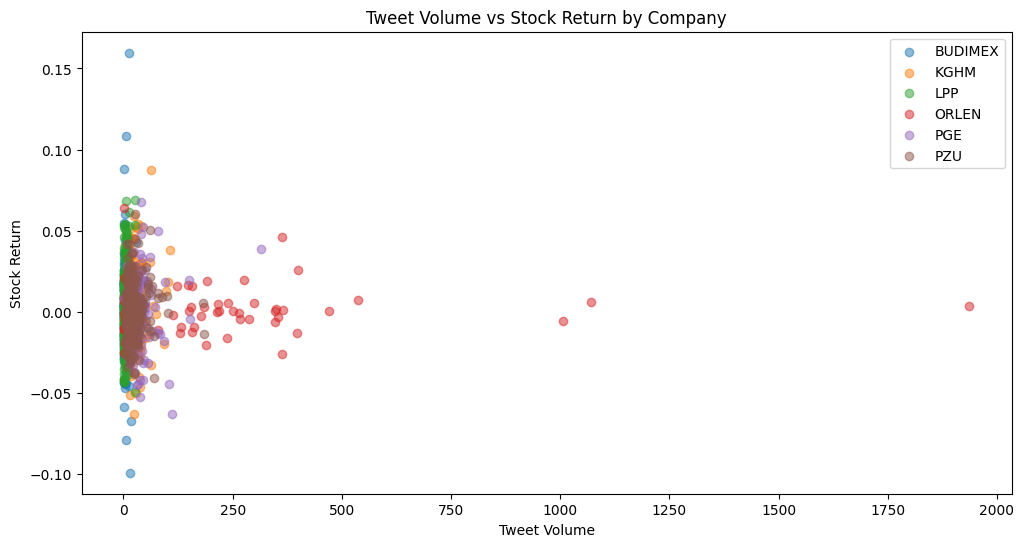

In [38]:
plt.figure(figsize=(12, 6))
for company in companies:
    company_data = company_results[company]
    plt.scatter(company_data['tweet_volume'], company_data['Return'], label=company, alpha=0.5)
plt.xlabel('Tweet Volume')
plt.ylabel('Stock Return')
plt.title('Tweet Volume vs Stock Return by Company')
plt.legend()
plt.show()

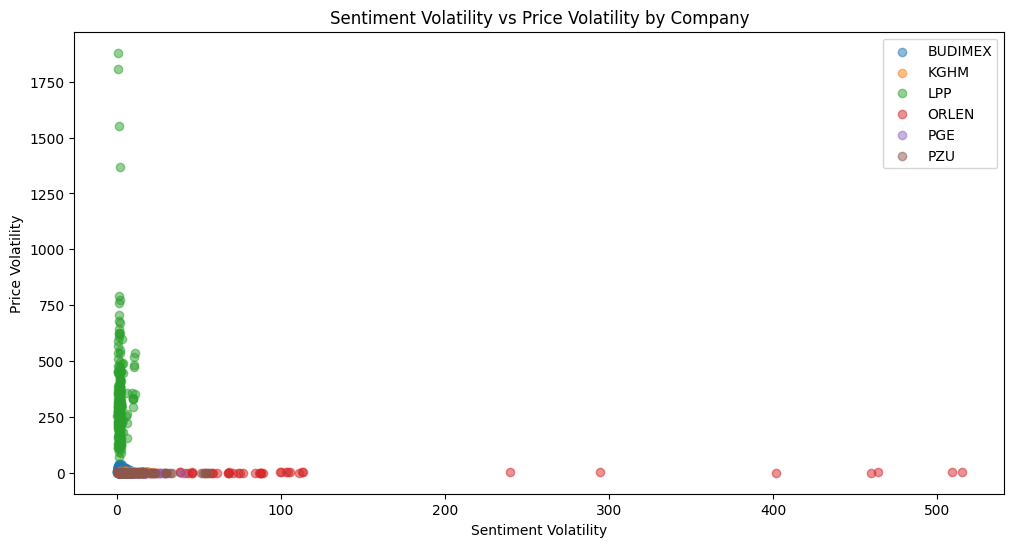

In [39]:
plt.figure(figsize=(12, 6))
for company in companies:
    company_data = company_results[company]
    company_data['sentiment_volatility'] = company_data['sentiment_score'].rolling(window=5).std()
    company_data['price_volatility'] = company_data['Zamkniecie'].rolling(window=5).std()
    plt.scatter(company_data['sentiment_volatility'], company_data['price_volatility'], label=company, alpha=0.5)
plt.xlabel('Sentiment Volatility')
plt.ylabel('Price Volatility')
plt.title('Sentiment Volatility vs Price Volatility by Company')
plt.legend()
plt.show()

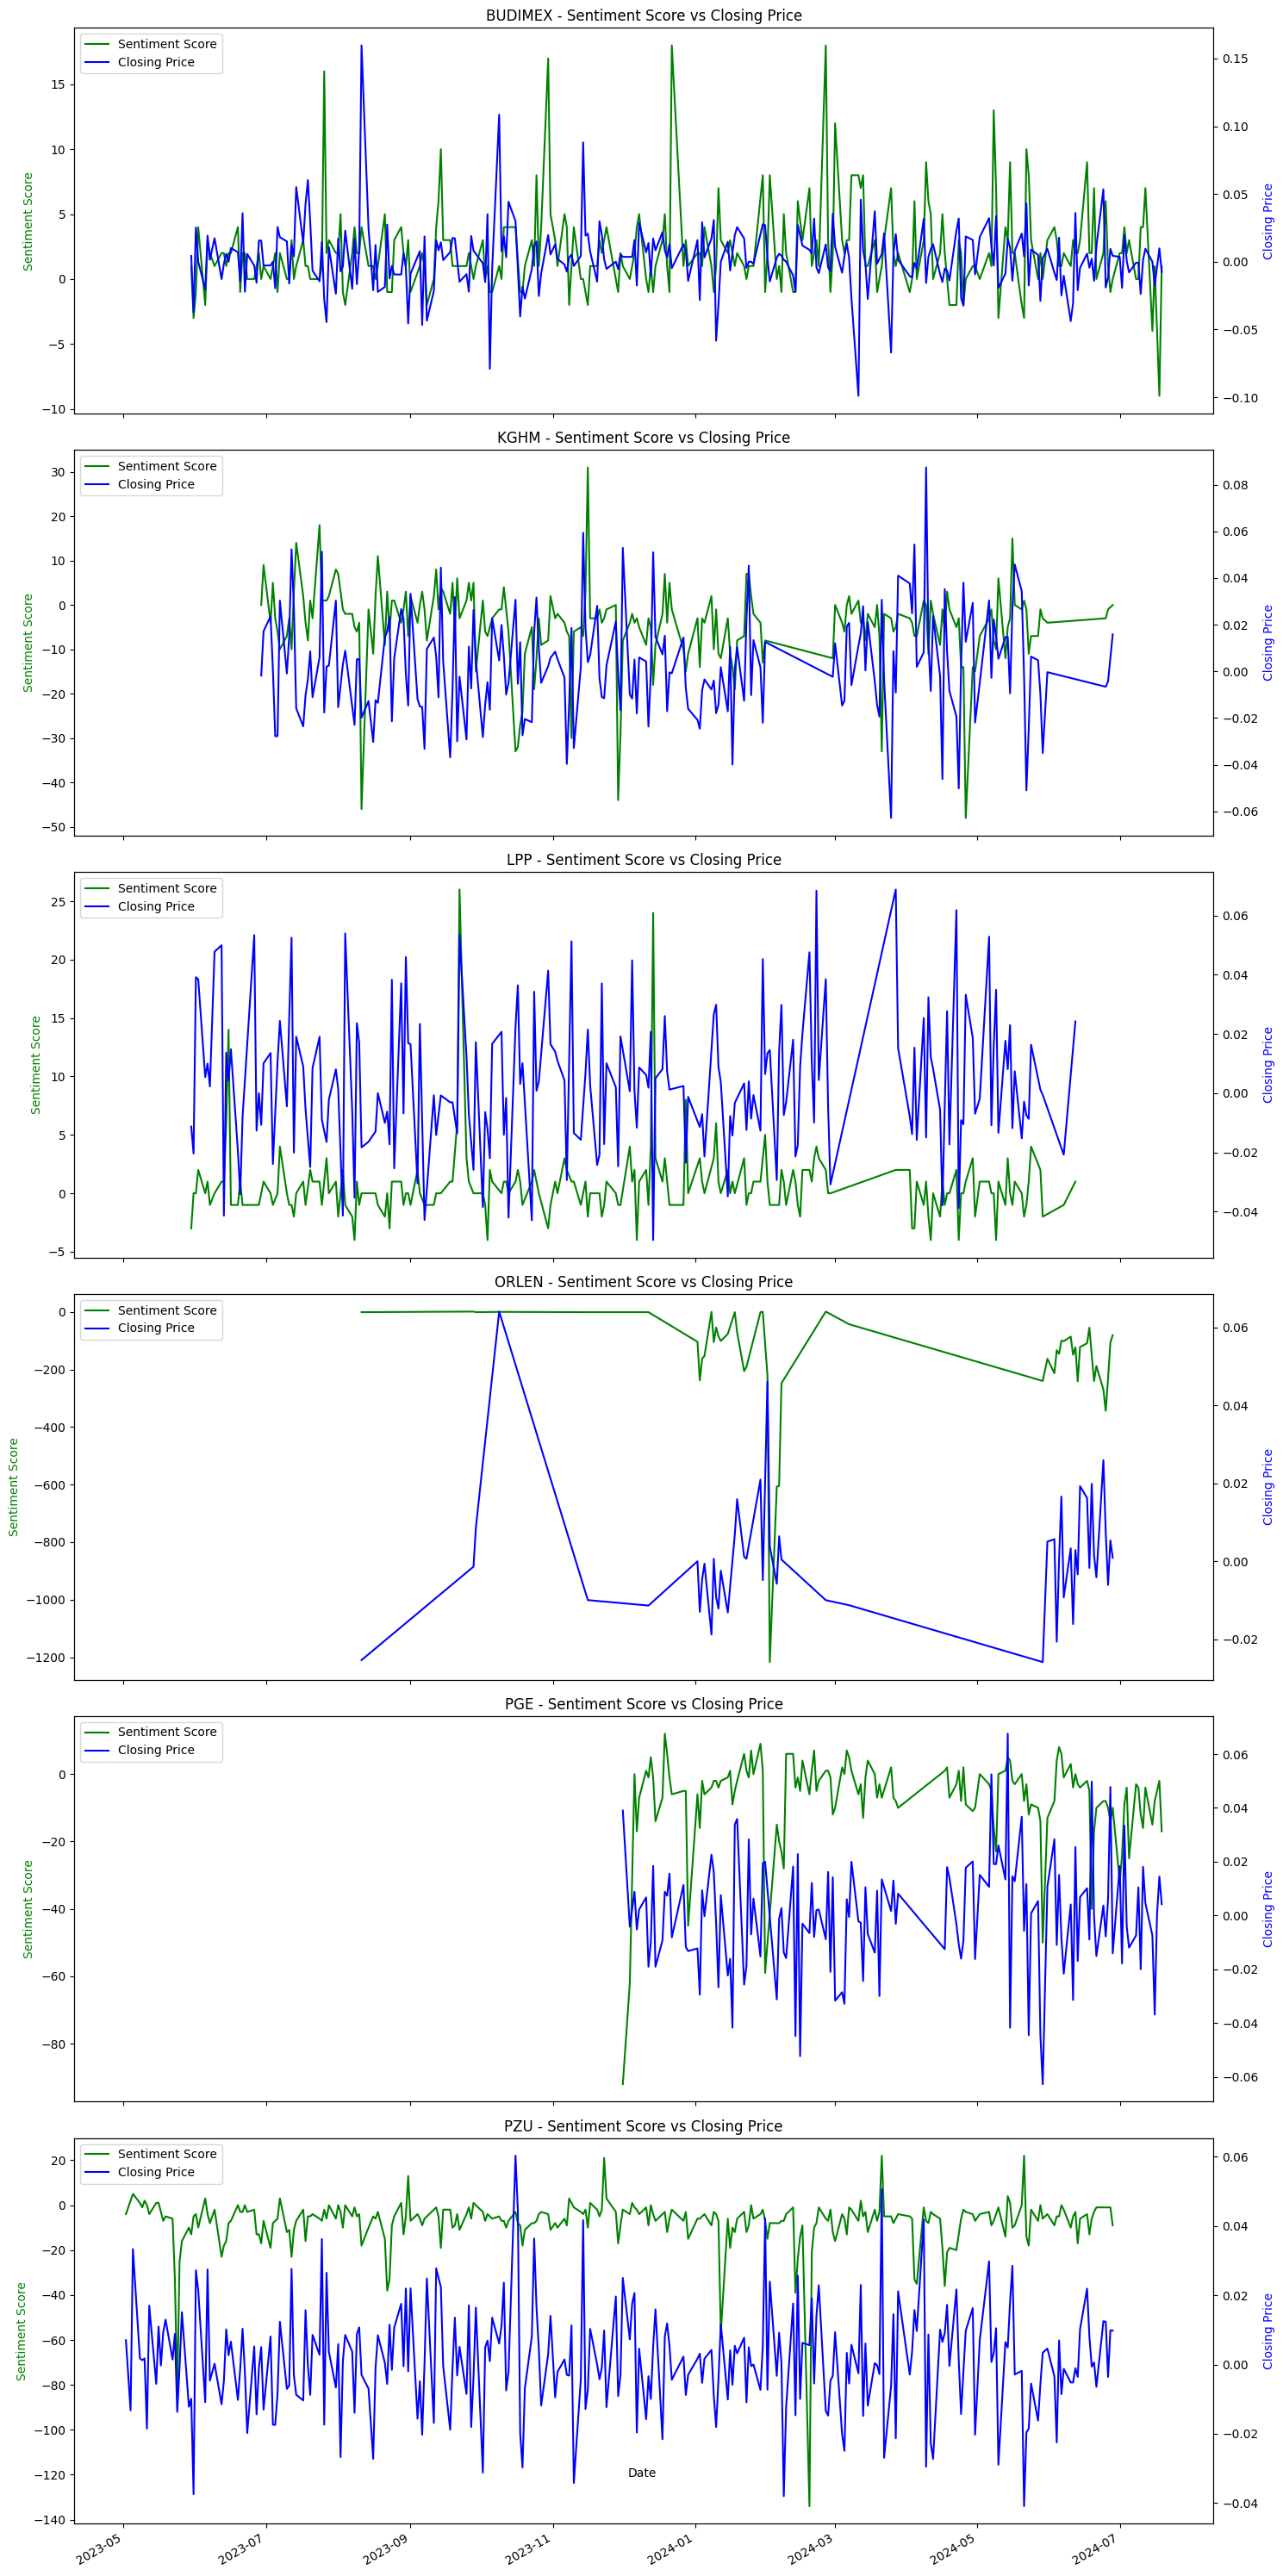

In [53]:
fig, axes = plt.subplots(len(companies), 1, figsize=(15, 5*len(companies)), sharex=True)
for i, company in enumerate(companies):
    company_data = company_results[company]

    
    ax1 = axes[i]
    ax2 = ax1.twinx()
    ax1.plot(company_data['created_at'], company_data['sentiment_score'], 'g-', label='Sentiment Score')
    ax2.plot(company_data['created_at'], company_data['Return'], 'b-', label='Closing Price')
    ax1.set_ylabel('Sentiment Score', color='g')
    ax2.set_ylabel('Closing Price', color='b')
    ax1.set_title(f'{company} - Sentiment Score vs Closing Price')
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

    fig.autofmt_xdate() 
    
# Set common x-axis label
fig.text(0.5, 0.04, 'Date', ha='center')
plt.tight_layout()
plt.show()

In [46]:
for i, company in enumerate(companies):
    company_data = company_results[company]
    ax1 = axes[i]
    ax2 = ax1.twinx()

    # Use 'created_at' as the x-axis
    ax1.plot(company_data['created_at'], company_data['sentiment_score'], 'g-', label='Sentiment Score')
    ax2.plot(company_data['created_at'], company_data['Zamkniecie'], 'b-', label='Closing Price')
    
    ax1.set_ylabel('Sentiment Score', color='g')
    ax2.set_ylabel('Closing Price', color='b')
    ax1.set_title(f'{company} - Sentiment Score vs Closing Price')
    
    # Add legends
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Set x-axis label
ax1.set_xlabel('Date')

# Optional: Format the x-axis date labels
fig.autofmt_xdate()  # Automatically format the x-axis dates for better visibility

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

C:\Users\szymo\AppData\Local\Temp\ipykernel_15308\3679164389.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlation_data = merged_daily.groupby('company').apply(lambda x: x[['sentiment_score', 'Zamkniecie', 'Wolumen', 'Return']].corr())


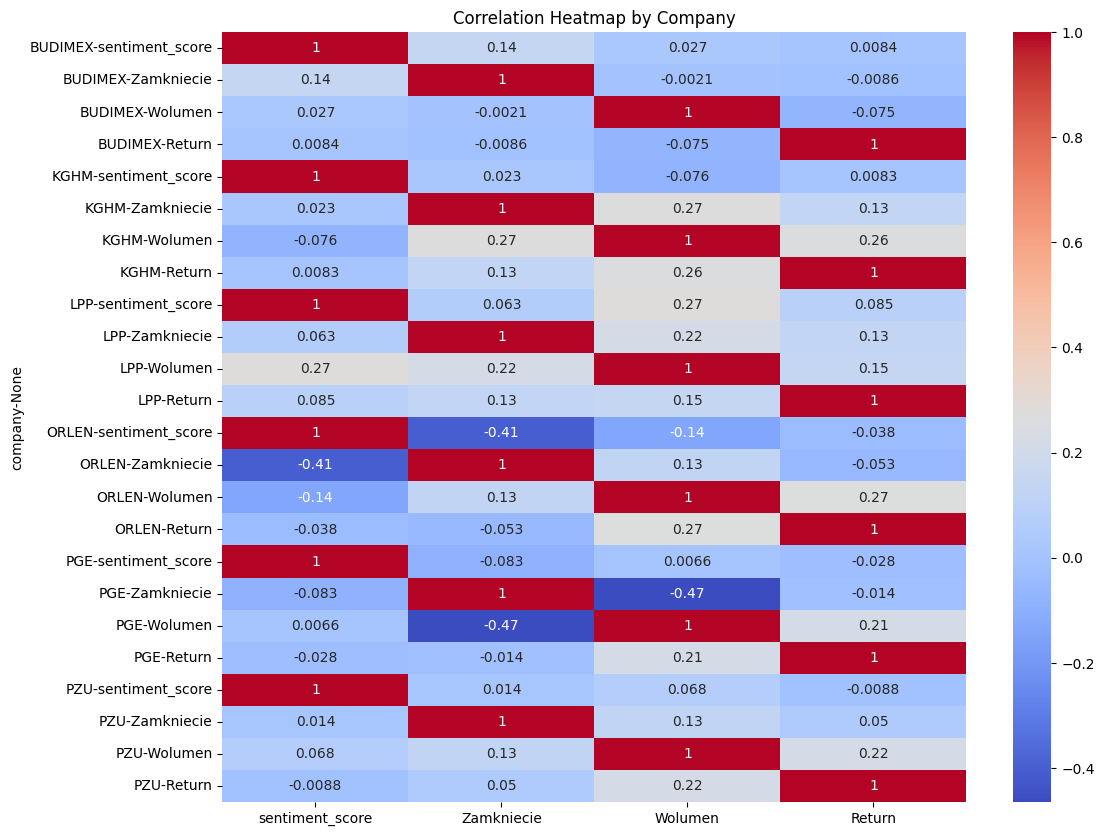

In [40]:
correlation_data = merged_daily.groupby('company').apply(lambda x: x[['sentiment_score', 'Zamkniecie', 'Wolumen', 'Return']].corr())
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap by Company')
plt.show()

In [56]:
def fit_regression(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return model, mse, r2

In [65]:
company_results['PZU'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 291 entries, 896 to 1186
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   company                 291 non-null    object        
 1   created_at              291 non-null    datetime64[ns]
 2   view_count_Negative     291 non-null    float64       
 3   view_count_Neutral      291 non-null    float64       
 4   view_count_Positive     291 non-null    float64       
 5   retweet_count_Negative  291 non-null    float64       
 6   retweet_count_Neutral   291 non-null    float64       
 7   retweet_count_Positive  291 non-null    float64       
 8   Otwarcie                291 non-null    float64       
 9   Najwyzszy               291 non-null    float64       
 10  Najnizszy               291 non-null    float64       
 11  Zamkniecie              291 non-null    float64       
 12  Wolumen                 291 non-null    float64     

In [119]:
def analyze_feature_importance(X, y):
    # Correlation
    corr = X.corrwith(y)
    
    # F-regression
    f_scores, _ = f_regression(X, y)
    
    # Mutual Information
    mi_scores = mutual_info_regression(X, y)
    
    # Combine results
    importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Correlation': corr,
        'F_Score': f_scores,
        'Mutual_Info': mi_scores
    })
    
    return importance_df.sort_values('Mutual_Info', ascending=False)

def fit_lasso(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = Lasso(alpha=0.1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return model, mse, r2

def analyze_company(company_data, company_name):
    print(f"\nAnalysis for {company_name}")
    
    results = {}
    
    for target in stock_targets:
        print(f"\nAnalyzing target: {target}")
        
        # Analyze individual feature importance
        importance_df = analyze_feature_importance(company_data[tweet_features], company_data[target])
        print("Top 5 important features:")
        print(importance_df.head())
        
        # Fit Lasso regression
        model, mse, r2 = fit_lasso(company_data[tweet_features], company_data[target])
        
        print("\nLasso Regression Results:")
        print(f"Mean Squared Error: {mse:.4f}")
        print(f"R-squared: {r2:.4f}")
        
        # Get non-zero coefficients
        non_zero_coef = pd.Series(model.coef_, index=tweet_features)
        non_zero_coef = non_zero_coef[non_zero_coef != 0].sort_values(key=abs, ascending=False)
        print("\nNon-zero Lasso coefficients:")
        print(non_zero_coef)
        
        results[target] = {
            'importance': importance_df,
            'lasso_model': model,
            'mse': mse,
            'r2': r2,
            'non_zero_coef': non_zero_coef
        }
    
    return results


In [117]:
# Define tweet-related features and stock-related targets
tweet_features = ['view_count_Negative', 'view_count_Neutral', 'view_count_Positive',
                  'retweet_count_Negative', 'retweet_count_Neutral', 'retweet_count_Positive',
                  'Negative', 'Neutral', 'Positive', 'sentiment_score', 'tweet_volume']

stock_targets = ['Otwarcie', 'Najwyzszy', 'Najnizszy', 'Zamkniecie', 'Wolumen', 'Return', 'volatility']
stock_targets = ['Return']

In [118]:
# Analyze each company
companies = merged_daily['company'].unique()
all_results = {}

for company in companies:
    company_data = merged_daily[merged_daily['company'] == company].copy()
    all_results[company] = analyze_company_feature(company_data, company)

# Comparative analysis across companies
print("\nComparative Analysis Across Companies")

for target in stock_targets:
    print(f"\nTop features for {target}:")
    all_top_features = pd.DataFrame({company: results[target]['non_zero_coef'].index[:3] 
                                     for company, results in all_results.items()})
    print(all_top_features)

    print(f"\nR-squared values for {target}:")
    r2_values = pd.Series({company: results[target]['r2'] for company, results in all_results.items()})
    print(r2_values.sort_values(ascending=False))




Analysis for BUDIMEX

Analyzing target: Return


KeyError: "['Negative', 'Neutral', 'Positive', 'sentiment_score', 'tweet_volume'] not in index"

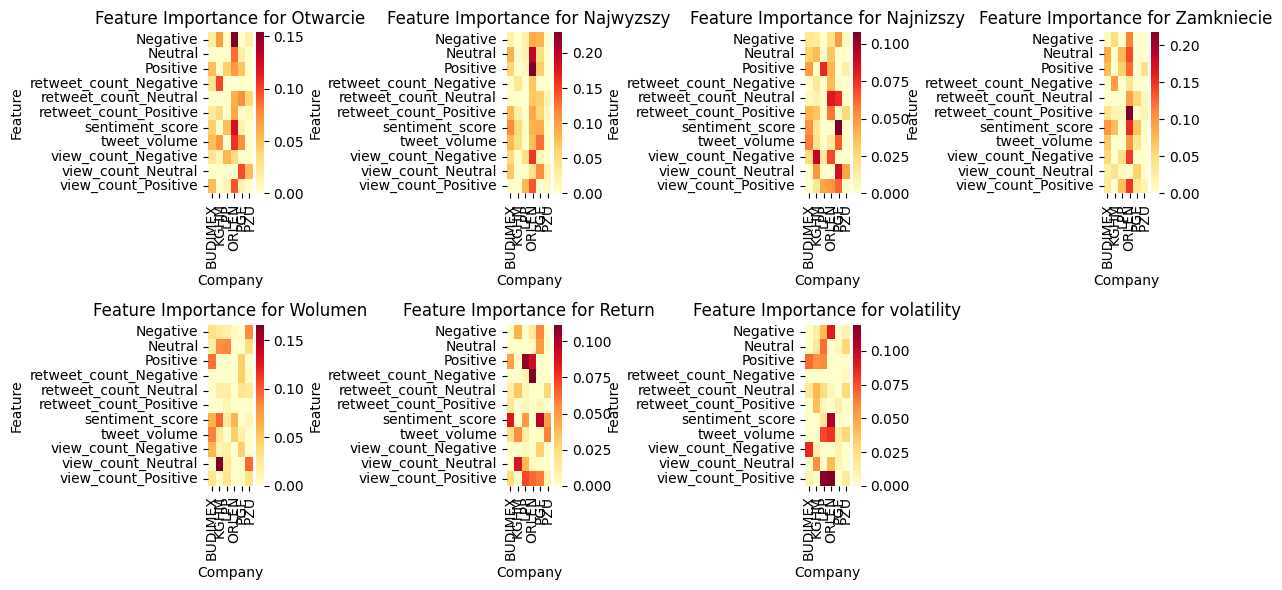


Summary Statistics:
       view_count_Negative  view_count_Neutral  view_count_Positive  \
count         1.187000e+03         1187.000000          1187.000000   
mean          1.572481e+04         5257.856782          9601.995788   
std           7.355697e+04        19382.074639         50112.904562   
min           0.000000e+00            0.000000             0.000000   
25%           4.850000e+01           75.500000           188.500000   
50%           8.080000e+02          698.000000          1244.000000   
75%           3.904500e+03         3185.000000          4351.000000   
max           1.395166e+06       288133.000000        801657.000000   

       retweet_count_Negative  retweet_count_Neutral  retweet_count_Positive  \
count             1187.000000            1187.000000             1187.000000   
mean                91.619208              16.206403               18.439764   
std                415.362717             110.824970              110.040329   
min                

In [69]:
# Visualization of feature importance across companies
plt.figure(figsize=(12, 6))
for i, target in enumerate(stock_targets):
    plt.subplot(2, 4, i+1)
    feature_importance = pd.DataFrame({company: results[target]['importance']['Mutual_Info'] 
                                       for company, results in all_results.items()})
    sns.heatmap(feature_importance, cmap='YlOrRd')
    plt.title(f'Feature Importance for {target}')
    plt.xlabel('Company')
    plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics:")
print(merged_daily[tweet_features + stock_targets].describe())

## Weekly data

In [ ]:
df_with_prices['year_month_week'] = (
    df_with_prices['created_at'].dt.year.astype(str) + '-' +
    df_with_prices['created_at'].dt.month.astype(str).str.zfill(2) + '-' +
    df_with_prices['created_at'].dt.isocalendar().week.astype(str)
)

### Monthly data

In [90]:
counts = df_with_prices[df_with_prices['company'] == 'PZU'].groupby(['year_month', 'sentiment']).size().unstack()

<Axes: xlabel='year_month'>

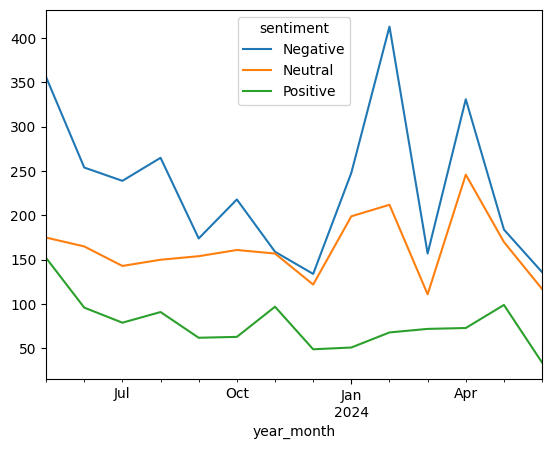

In [91]:
counts.plot()

In [107]:
aggregations = {
    'view_count': 'sum', 
    'retweet_count': 'sum'
}

grouped_metrics = df_with_prices.groupby(['company','year_month', 'sentiment']).agg(aggregations).unstack()
grouped_metrics['view_count'] = grouped_metrics['view_count'].fillna(0)
grouped_metrics['retweet_count'] = grouped_metrics['retweet_count'].fillna(0)
grouped_metrics = grouped_metrics.reset_index()
grouped_metrics.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in grouped_metrics.columns]
grouped_metrics = grouped_metrics.rename(columns = {'company_':'company','year_month_':'year_month'})
average_metrics = df_with_prices.groupby(['year_month', 'company'])[['Otwarcie', 'Najwyzszy', 'Najnizszy', 'Zamkniecie', 'Wolumen', 'Return']].mean().reset_index()
merged_monthly = pd.merge(grouped_metrics,average_metrics,left_on=['company','year_month'],right_on=['company','year_month'])
df_counted = df_with_prices.groupby(['company', 'year_month', 'sentiment']).size().unstack(fill_value=0)
merged_monthly = merged_monthly.join(df_counted, on=['company', 'year_month'], rsuffix='_count')
merged_monthly['sentiment_score'] = merged_monthly['Positive'] - merged_monthly['Negative']
merged_monthly['tweet_volume'] = merged_monthly['Positive'] + merged_monthly['Neutral'] + merged_monthly['Negative']
merged_monthly['volatility'] = (merged_monthly['Najwyzszy'] - merged_monthly['Najnizszy']) / merged_monthly['Otwarcie']
merged_monthly


company year_month  view_count_Negative  view_count_Neutral  \
0   BUDIMEX    2023-05                127.0                 0.0   
1   BUDIMEX    2023-06               4512.0              6248.0   
2   BUDIMEX    2023-07               4454.0             10921.0   
3   BUDIMEX    2023-08               6891.0             24256.0   
4   BUDIMEX    2023-09                781.0              1794.0   
..      ...        ...                  ...                 ...   
69      PZU    2024-02             936663.0            132829.0   
70      PZU    2024-03             185782.0            116179.0   
71      PZU    2024-04             653751.0            179092.0   
72      PZU    2024-05             134468.0             75971.0   
73      PZU    2024-06             127104.0             51061.0   

    view_count_Positive  retweet_count_Negative  retweet_count_Neutral  \
0                7555.0                     0.0                    0.0   
1               26140.0                     5.0                    0.0   
2               25702.0                     5.0                    3.0   
3               30281.0                     3.0                    6.0   
4               20527.0                     0.0                    0.0   
..                  ...                     ...                    ...   
69              40193.0                  2511.0                  513.0   
70              85279.0                  1217.0                  380.0   
71             132128.0                  5213.0                 1213.0   
72              53220.0                  1236.0                  114.0   
73               9739.0                   358.0                   25.0   

    retweet_count_Positive    Otwarcie   Najwyzszy   Najnizszy  Zamkniecie  \
0                      0.0  327.543167  328.976833  318.945167  323.563000   
1                     13.0  331.918825  335.588794  328.711333  333.283730   
2                      6.0  395.478916  404.630181  388.175229  396.359361   
3                     10.0  438.908674  449.812543  430.901957  440.035380   
4                     14.0  407.036500  412.684441  397.503382  407.310426   
..                     ...         ...         ...         ...         ...   
69                    33.0   43.990635   44.568057   43.641495   44.049714   
70                    32.0   43.864827   44.460144   43.250572   43.871704   
71                   912.0   45.274396   46.052882   44.913178   45.713539   
72                   105.0   47.887061   48.377975   47.032803   47.563529   
73                    11.0   44.674798   45.124744   44.304245   44.617131   

         Wolumen    Return  Negative  Neutral  Positive  sentiment_score  \
0   2.879207e+04 -0.030278         4        0         2               -2   
1   2.053787e+04  0.003220        12       12        39               27   
2   2.522983e+04  0.003729        16       14        53               37   
3   2.407288e+05  0.013386        14       28        50               36   
4   3.975870e+04  0.001648        12        9        47               35   
..           ...       ...       ...      ...       ...              ...   
69  1.330902e+06  0.001676       413      212        68             -345   
70  2.366394e+06  0.005775       157      111        72              -85   
71  1.835378e+06  0.007959       331      246        73             -258   
72  2.297064e+06 -0.006455       184      170        99              -85   
73  1.732595e+06  0.001375       136      117        34             -102   

    tweet_volume  volatility  
0              6    0.030627  
1             63    0.020720  
2             83    0.041608  
3             92    0.043085  
4             68    0.037297  
..           ...         ...  
69           693    0.021063  
70           340    0.027575  
71           650    0.025173  
72           453    0.028091  
73           287    0.018366  

[74 rows x 20 columns]

In [121]:
companies = merged_monthly['company'].unique()
company_results = {}

for company in companies:
    company_data = merged_monthly[merged_monthly['company'] == company].copy()
    company_results[company] = analyze_company_basic(company_data, company)


Analysis for BUDIMEX
Correlation between sentiment score and closing price: 0.56
Correlation between tweet volume and stock volatility: 0.38
Average return on extreme sentiment days: -0.0303
Average return on normal sentiment days: 0.0037
Correlation between sentiment score and return with 1 day lag: -0.41
Correlation between sentiment score and return with 2 day lag: -0.02
Correlation between sentiment score and return with 3 day lag: -0.41
Correlation between sentiment score and return with 4 day lag: -0.09
Correlation between sentiment score and return with 5 day lag: -0.54

Analysis for KGHM
Correlation between sentiment score and closing price: 0.08
Correlation between tweet volume and stock volatility: 0.70
Average return on extreme sentiment days: nan
Average return on normal sentiment days: 0.0035
Correlation between sentiment score and return with 1 day lag: -0.11
Correlation between sentiment score and return with 2 day lag: 0.04
Correlation between sentiment score and retur

In [123]:
company_results['KGHM']

company year_month  view_count_Negative  view_count_Neutral  \
15    KGHM    2023-06                790.0               373.0   
16    KGHM    2023-07             329817.0             49811.0   
17    KGHM    2023-08             132463.0             91255.0   
18    KGHM    2023-09              64124.0             18043.0   
19    KGHM    2023-10             152522.0             52742.0   
20    KGHM    2023-11             221208.0             64154.0   
21    KGHM    2023-12              89759.0             45826.0   
22    KGHM    2024-01             282520.0            259208.0   
23    KGHM    2024-02              11638.0               531.0   
24    KGHM    2024-03             206810.0            106965.0   
25    KGHM    2024-04             307168.0            137911.0   
26    KGHM    2024-05              64757.0             49208.0   
27    KGHM    2024-06                460.0                22.0   

    view_count_Positive  retweet_count_Negative  retweet_count_Neutral  \
15               6480.0                     1.0                    0.0   
16             155032.0                  2042.0                   19.0   
17             106496.0                  1290.0                  134.0   
18              72326.0                   666.0                   20.0   
19             112543.0                   855.0                  270.0   
20             346056.0                   598.0                   39.0   
21              57053.0                   302.0                  126.0   
22              67193.0                  1907.0                 1654.0   
23                178.0                   263.0                    0.0   
24              57442.0                  2365.0                   69.0   
25             230788.0                  2612.0                   55.0   
26              96496.0                   202.0                   22.0   
27                 36.0                     0.0                    0.0   

    retweet_count_Positive    Otwarcie   Najwyzszy  ...  Zamkniecie  \
15                    19.0  109.178125  110.771469  ...  110.314719   
16                   540.0  115.041669  116.819326  ...  115.693571   
17                   710.0  111.705758  112.655332  ...  111.188829   
18                   166.0  111.485765  112.756792  ...  111.199269   
19                   147.0  108.784333  110.325058  ...  108.556817   
20                   335.0  111.636022  113.405993  ...  112.010118   
21                    89.0  119.837672  121.780360  ...  120.238740   
22                    36.0  111.368769  112.241421  ...  110.316403   
23                     0.0  107.516000  108.160000  ...  106.724000   
24                    61.0  111.530003  113.137799  ...  111.795471   
25                  1894.0  135.060615  138.536795  ...  136.240630   
26                    36.0  152.712447  155.257290  ...  152.955906   
27                     0.0  150.199667  152.002444  ...  149.573778   

         Wolumen    Return  Negative  Neutral  Positive  sentiment_score  \
15  3.248951e+05  0.016594         8        7        17                9   
16  5.703713e+05  0.005849       163       96       161               -2   
17  4.988832e+05 -0.004718       233      132       156              -77   
18  4.693687e+05 -0.000657       141       87       147                6   
19  6.071915e+05  0.001183       353      119       147             -206   
20  6.197454e+05  0.002047       324      148       200             -124   
21  6.386472e+05  0.006501       221       98       120             -101   
22  5.772861e+05 -0.004204       236      146       107             -129   
23  1.452088e+06 -0.002318        16        9         4              -12   
24  8.807405e+05  0.003646       175      113        86              -89   
25  1.222222e+06  0.017044       355      195       196             -159   
26  8.070285e+05  0.005526       190      116       128              -62   
27  5.436763e+05 -0.001338         6        1         2   

In [ ]:
company_data['year_month'] = company_data['year_month'].dt.to_timestamp()

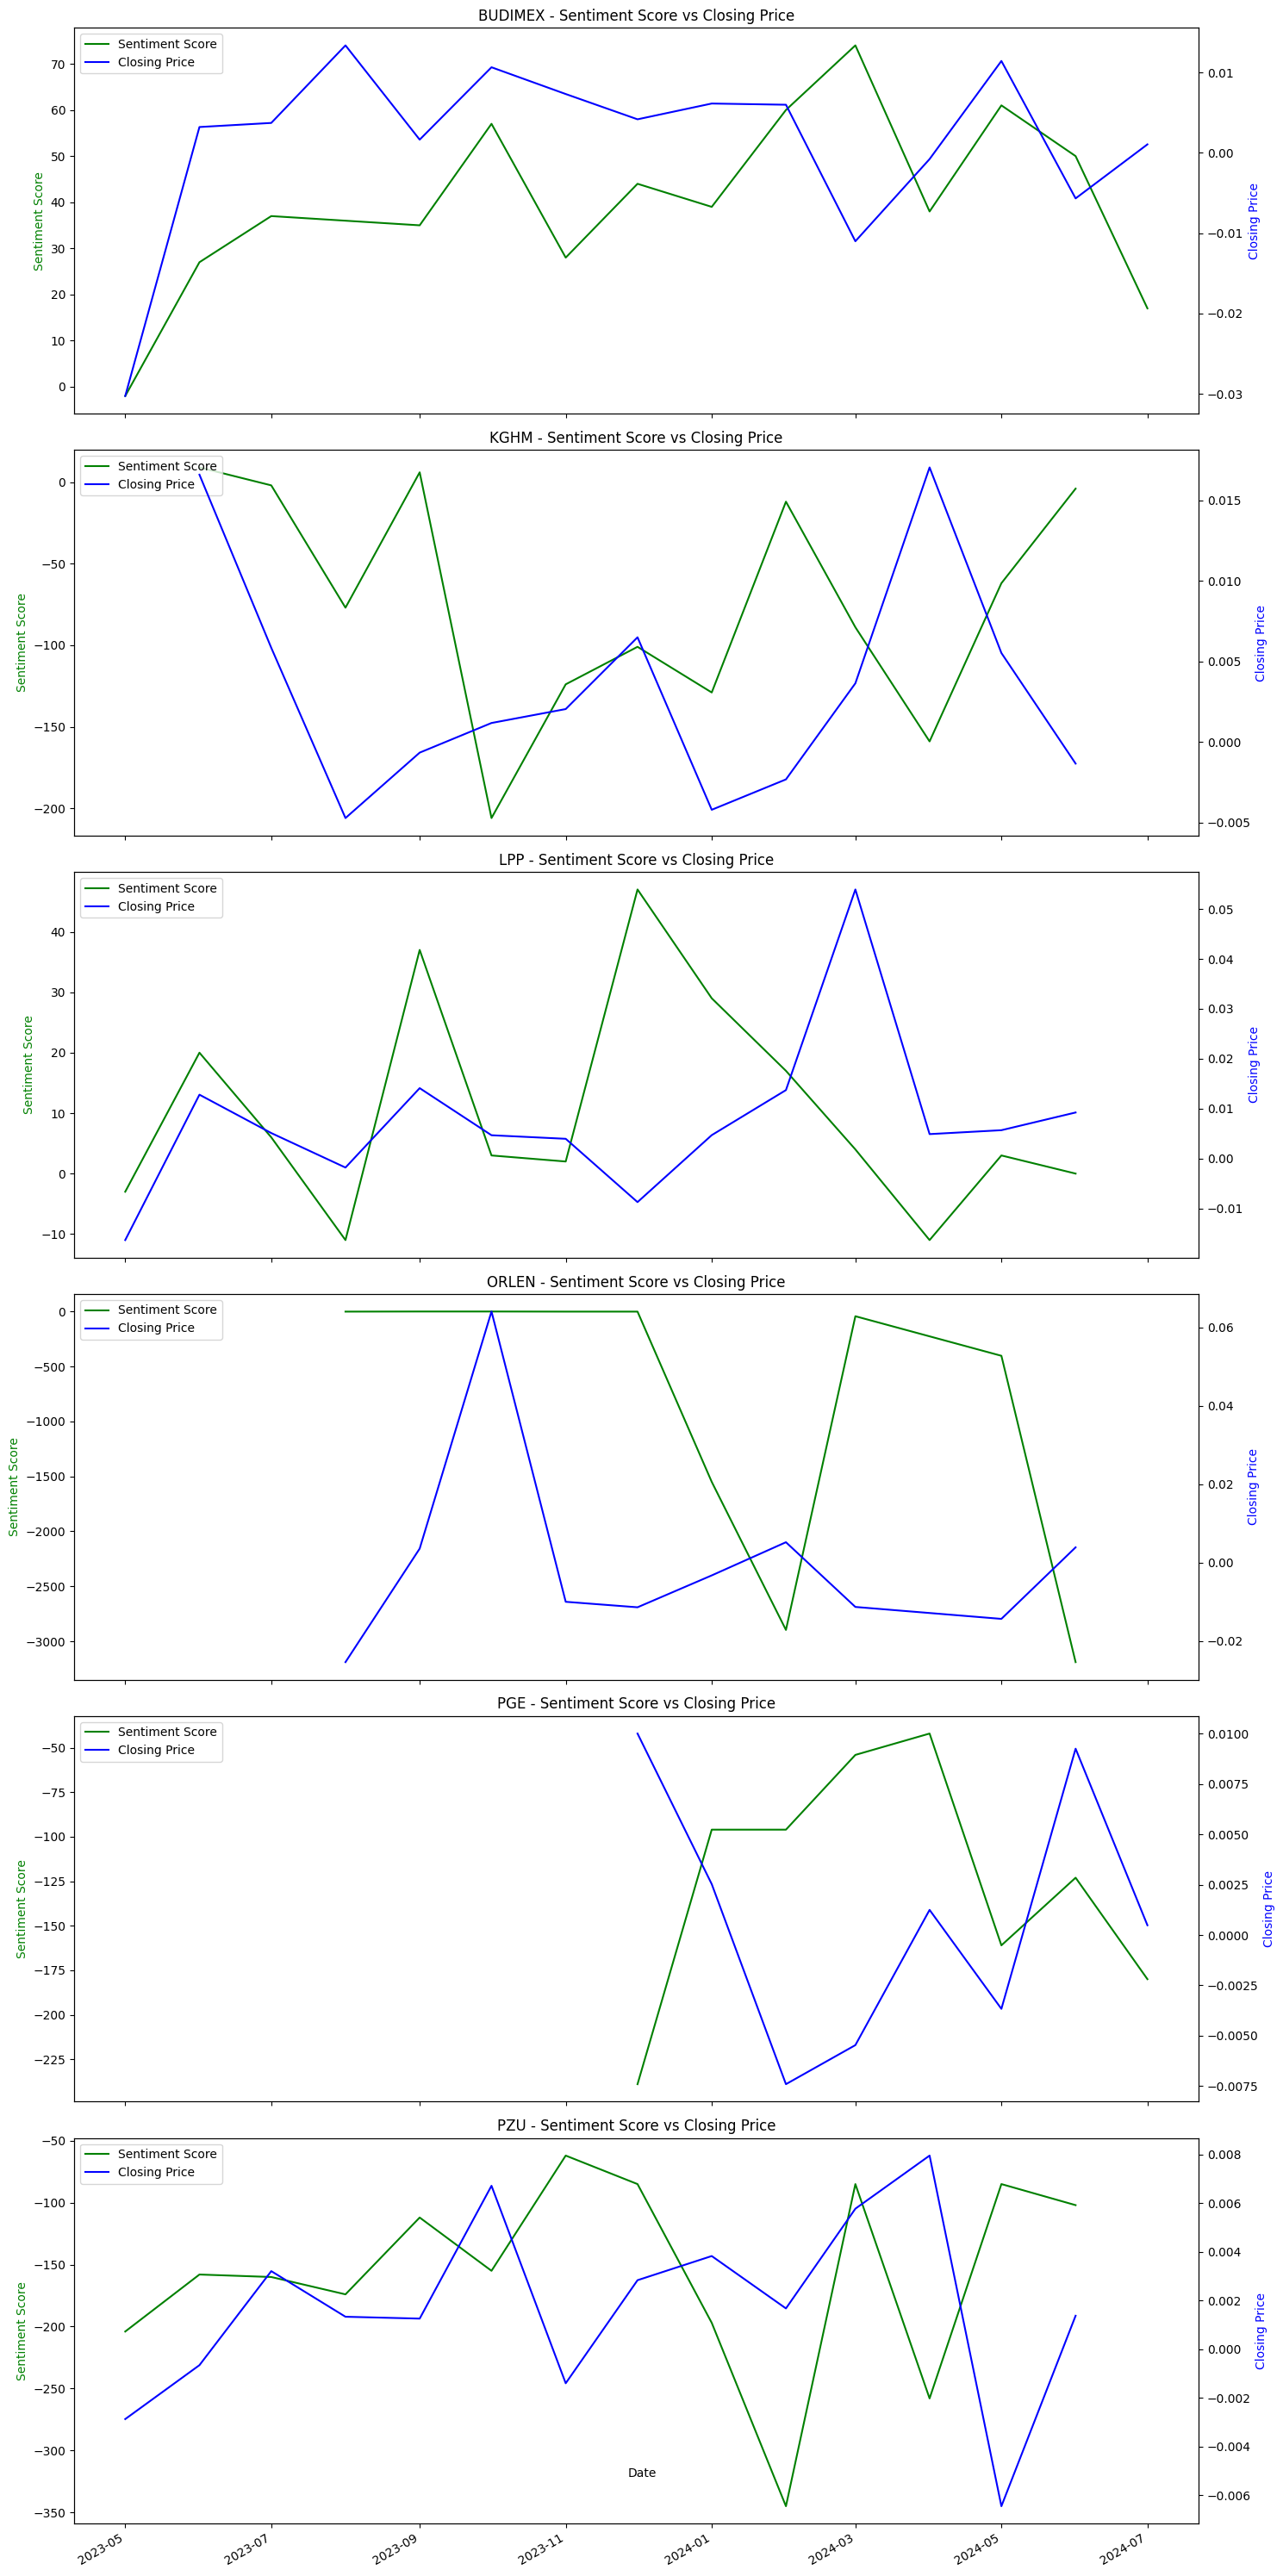

In [130]:

fig, axes = plt.subplots(len(companies), 1, figsize=(15, 5*len(companies)), sharex=True)
for i, company in enumerate(companies):
    company_data = company_results[company]
    

    
    ax1 = axes[i]
    ax2 = ax1.twinx()
    ax1.plot(company_data['year_month'], company_data['sentiment_score'], 'g-', label='Sentiment Score')
    ax2.plot(company_data['year_month'], company_data['Return'], 'b-', label='Closing Price')
    ax1.set_ylabel('Sentiment Score', color='g')
    ax2.set_ylabel('Closing Price', color='b')
    ax1.set_title(f'{company} - Sentiment Score vs Closing Price')
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

    fig.autofmt_xdate() 
    
# Set common x-axis label
fig.text(0.5, 0.04, 'Date', ha='center')
plt.tight_layout()
plt.show()

In [100]:
average_metrics

year_month  company      Otwarcie     Najwyzszy     Najnizszy  \
0     2023-05  BUDIMEX    327.543167    328.976833    318.945167   
1     2023-05      LPP  11629.411111  11805.744444  11413.933333   
2     2023-05      PZU     34.446107     34.817664     34.051747   
3     2023-06  BUDIMEX    331.918825    335.588794    328.711333   
4     2023-06     KGHM    109.178125    110.771469    108.298750   
..        ...      ...           ...           ...           ...   
69    2024-06    ORLEN     60.447209     61.109130     60.024196   
70    2024-06      PGE      6.897505      7.047540      6.819816   
71    2024-06      PZU     44.674798     45.124744     44.304245   
72    2024-07  BUDIMEX    676.858696    684.239130    667.271739   
73    2024-07      PGE      7.271457      7.335338      7.134222   

      Zamkniecie       Wolumen    Return  
0     323.563000  2.879207e+04 -0.030278  
1   11512.144444  4.502091e+03 -0.016360  
2      34.351553  1.962812e+06 -0.002873  
3     333.283730  2.053787e+04  0.003220  
4     110.314719  3.248951e+05  0.016594  
..           ...           ...       ...  
69     60.588639  2.311724e+06  0.003929  
70      6.935795  2.627671e+06  0.009252  
71     44.617131  1.732595e+06  0.001375  
72    677.114130  2.027126e+04  0.001058  
73      7.246419  2.035619e+06  0.000487  

[74 rows x 8 columns]